In [1]:
import numpy as np

In [2]:
import numpy as np

In [3]:
import numpy as np

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import deepxde as dde
from deepxde.backend import tf
from scipy.interpolate import LinearNDInterpolator
import xarray as xr
import pandas as pd

2023-09-13 12:09:15.295631: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 12:09:53.330400: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Enable just-in-time compilation with XLA.



In [6]:
pwd

'/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn/scripts/python'

In [7]:
cd ..

/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn/scripts


In [8]:
cd ..

/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn


In [9]:
cd ..

/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace


In [10]:
dataset = xr.load_dataset("data/cglite_freeW_ERA_MKL_2010-2020/cglite_freeW_ERA_MKL_2010-2020.nc")

In [11]:
input_data = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/input_data.csv")
parameters = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/parameters.csv")

In [12]:
def generate_data(num=900, num_coords=36500, num_run = 100, num_time=10, num_space=100, num_params = 13, num_input=73, time_span=365):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    return (u0, xt), u

In [13]:
x, y = generate_data()

<ipython-input-12-565200b904bb>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


ValueError: cannot reshape array of size 35800 into shape (36500,1)

In [14]:
def generate_data(num=900, num_coords=36500, num_run = 100, num_time=9, num_space=100, num_params = 13, num_input=73, time_span=365):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    return (u0, xt), u

In [15]:
x, y = generate_data()

<ipython-input-14-1eadce1defea>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


In [16]:
x[0].shape

(900, 86)

In [17]:
input_data

time       Tair
0     2010-09-01   4.452540
1     2010-09-02   5.192011
2     2010-09-03   3.538752
3     2010-09-04   1.594558
4     2010-09-05   1.962560
...          ...        ...
3769  2020-12-26 -23.300710
3770  2020-12-27 -30.399997
3771  2020-12-28 -29.606090
3772  2020-12-29 -33.144826
3773  2020-12-30 -32.971528

[3774 rows x 2 columns]

In [18]:
input_data[0]

KeyError: 0

In [19]:
input_data_arr = np.array(input_data["Tair"])

In [20]:
input_data_arr.shape

(3774,)

In [21]:
input_data_arr[3773]

-32.97152843255651

In [22]:
input_data_arr[3408]

-35.28912671002364

In [23]:
new_arr = input_data_arr[3408:3773]

In [24]:
len(new_arr)

365

In [25]:
def generate_train_data(num=900, num_coords=36500, num_run = 100, num_time=9, num_space=100, num_params = 13, num_input=73, time_span=365):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    return (u0, xt), u

In [26]:
def generate_test_data(num=100, num_coords=36500, num_run = 100, num_time=1, num_space=100, num_params = 13, num_input=73, time_span=365):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773:5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]

In [27]:
def generate_test_data(num=100, num_coords=36500, num_run = 100, num_time=1, num_space=100, num_params = 13, num_input=73, time_span=365):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773:5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    return (u0, xt), u

In [28]:
x_train, y_train = generate_train_data()

<ipython-input-25-b829c1b1e866>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


In [29]:
x_test, y_test = generate_test_data()

<ipython-input-27-9a6c2a4cea9d>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


In [30]:
x_test[0].shape

(100, 86)

In [31]:
x_test[1].shape

(36500, 2)

In [32]:
y_test.shape

(100, 36500)

In [33]:
def train_DeepONet(nx=86, x_train=x_train,  y_train= y_train, x_test=x_test, y_test=y_test, num_epochs=40000):
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 512], [2, 512, 512, 512, 512], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=8000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [34]:
model, data = train_DeepONet()

2023-09-13 13:29:33.710022: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-09-13 13:29:33.710102: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38370 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-09-13 13:29:33.723023: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-09-13 13:29:33.723048: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38370 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2023-09-13 13:29:33.727432: W tensorflow/core/

Compiling model...
'compile' took 0.695720 s

Training model...



/home/guest/lizhen001/anaconda3/envs/cryopinn/lib/python3.11/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


TypeError: in user code:

    File "/home/guest/lizhen001/anaconda3/envs/cryopinn/lib/python3.11/site-packages/deepxde/model.py", line 221, in outputs_losses_train  *
        True, inputs, targets, auxiliary_vars, self.data.losses_train
    File "/home/guest/lizhen001/anaconda3/envs/cryopinn/lib/python3.11/site-packages/deepxde/model.py", line 206, in outputs_losses  *
        losses = losses_fn(targets, outputs_, loss_fn, inputs, self)
    File "/home/guest/lizhen001/anaconda3/envs/cryopinn/lib/python3.11/site-packages/deepxde/data/data.py", line 13, in losses_train  *
        return self.losses(targets, outputs, loss_fn, inputs, model, aux=aux)
    File "/home/guest/lizhen001/anaconda3/envs/cryopinn/lib/python3.11/site-packages/deepxde/data/triple.py", line 77, in losses  *
        return loss_fn(targets, outputs)
    File "/home/guest/lizhen001/anaconda3/envs/cryopinn/lib/python3.11/site-packages/deepxde/losses.py", line 23, in mean_squared_error  *
        return bkd.reduce_mean(bkd.square(y_true - y_pred))

    TypeError: Input 'y' of 'Sub' Op has type float32 that does not match type float64 of argument 'x'.


In [35]:
arr1 = x_test[0]

In [36]:
arr1[0]

array([ 8.69173253e-02,  6.57173712e-01,  9.15765684e-01,  5.66578819e-01,
        2.76665397e+00,  4.11655936e-01,  3.15752206e+00,  2.29471732e-02,
        2.54728308e+00,  4.21616177e-02, -9.10074932e+00,  7.08798068e-01,
        4.99392359e+02, -3.52891267e+01, -3.65112089e+01, -2.75474449e+01,
       -3.23406508e+01, -3.54500163e+01, -3.29836866e+01, -3.23997758e+01,
       -3.24469373e+01, -2.67605355e+01, -4.26582397e+01, -4.01211638e+01,
       -3.83855380e+01, -3.47228437e+01, -2.38381141e+01, -3.28597799e+01,
       -2.67295325e+01, -2.73061036e+01, -2.27467474e+01, -2.24238024e+01,
       -2.60025273e+01, -1.97750294e+01, -8.72884066e+00, -9.85772119e+00,
       -1.30472114e+01, -9.83794488e+00, -5.08339005e+00,  2.13805902e-01,
       -2.83011434e+00,  9.55723233e-01,  4.08714659e-01,  1.31638599e+00,
        3.41445627e-01,  8.26644386e+00,  1.88084387e+01,  1.05965821e+01,
        9.45506107e+00,  1.38323529e+01,  1.95964865e+01,  6.00017350e+00,
        2.40133310e+01,  

In [37]:
arr1.shape

(100, 86)

In [38]:
arr1[0,0]

0.0869173252733646

In [39]:
type(arr1[0,0])

numpy.float64

In [40]:
arr2 = x_test[1]

In [41]:
type(arr2[0,0])

numpy.float64

In [42]:
arr3 = y_test

In [43]:
type(arr3[0,0])

numpy.float64

In [44]:
def generate_train_data(num=900, num_coords=36500, num_run = 100, num_time=9, num_space=100, num_params = 13, num_input=73, time_span=365):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [45]:
def generate_test_data(num=100, num_coords=36500, num_run = 100, num_time=1, num_space=100, num_params = 13, num_input=73, time_span=365):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773:5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [46]:
def train_DeepONet(nx=86, num_epochs=40000):
    x_train, y_train = generate_train_data()
    x_test, y_test = generate_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 512], [2, 512, 512, 512, 512], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=8000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [48]:
def generate_train_data(num=900, num_coords=36500, num_run = 100, num_time=9, num_space=100, num_params = 13, num_input=73, time_span=365, space_span=100):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [49]:
def generate_test_data(num=100, num_coords=36500, num_run = 100, num_time=1, num_space=100, num_params = 13, num_input=73, time_span=365, space_span=100):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773:5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [50]:
def train_DeepONet(nx=86, num_epochs=40000):
    x_train, y_train = generate_train_data()
    x_test, y_test = generate_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 512], [2, 512, 512, 512, 512], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=8000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [52]:
space_coords = dataset["T"].coords["z"].values[0:100]

In [53]:
space_coords.shape

(100,)

In [54]:
space_coords[99]

5.95

In [55]:
space_coords[-1]

5.95

In [56]:
space_coords = dataset["T"].coords["z"].values

In [57]:
space_coords.shape

(218,)

In [58]:
space_coords[-1]

950.0

In [59]:
space_coords

array([2.500e-02, 7.500e-02, 1.250e-01, 1.750e-01, 2.250e-01, 2.750e-01,
       3.250e-01, 3.750e-01, 4.250e-01, 4.750e-01, 5.250e-01, 5.750e-01,
       6.250e-01, 6.750e-01, 7.250e-01, 7.750e-01, 8.250e-01, 8.750e-01,
       9.250e-01, 9.750e-01, 1.025e+00, 1.075e+00, 1.125e+00, 1.175e+00,
       1.225e+00, 1.275e+00, 1.325e+00, 1.375e+00, 1.425e+00, 1.475e+00,
       1.525e+00, 1.575e+00, 1.625e+00, 1.675e+00, 1.725e+00, 1.775e+00,
       1.825e+00, 1.875e+00, 1.925e+00, 1.975e+00, 2.025e+00, 2.075e+00,
       2.125e+00, 2.175e+00, 2.225e+00, 2.275e+00, 2.325e+00, 2.375e+00,
       2.425e+00, 2.475e+00, 2.525e+00, 2.575e+00, 2.625e+00, 2.675e+00,
       2.725e+00, 2.775e+00, 2.825e+00, 2.875e+00, 2.925e+00, 2.975e+00,
       3.025e+00, 3.075e+00, 3.125e+00, 3.175e+00, 3.225e+00, 3.275e+00,
       3.325e+00, 3.375e+00, 3.425e+00, 3.475e+00, 3.525e+00, 3.575e+00,
       3.625e+00, 3.675e+00, 3.725e+00, 3.775e+00, 3.825e+00, 3.875e+00,
       3.925e+00, 3.975e+00, 4.050e+00, 4.150e+00, 

In [60]:
def generate_train_data(num=900, num_coords=36500, num_run = 100, num_time=9, num_space=100, num_params = 13, num_input=73, time_span=365, space_span=5.95):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [61]:
def generate_test_data(num=100, num_coords=36500, num_run = 100, num_time=1, num_space=100, num_params = 13, num_input=73, time_span=365, space_span=5.95):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773:5]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [62]:
def train_DeepONet(nx=86, num_epochs=40000):
    x_train, y_train = generate_train_data()
    x_test, y_test = generate_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 512], [2, 512, 512, 512, 512], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=8000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [63]:
model, data = train_DeepONet()

<ipython-input-60-bac71e8fd1c5>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


Compiling model...
'compile' took 0.002590 s

Training model...

0         [2.58e+03]    [2.65e+03]    [1.05e+01]    
1000      [2.99e+01]    [6.16e+01]    [9.79e-01]    
2000      [1.77e+00]    [4.93e+01]    [1.39e+00]    
3000      [1.01e+00]    [5.18e+01]    [1.45e+00]    
4000      [9.95e-01]    [5.12e+01]    [1.43e+00]    
5000      [9.89e-01]    [4.79e+01]    [1.37e+00]    
6000      [9.77e-01]    [3.83e+01]    [1.22e+00]    
7000      [1.24e+00]    [5.03e+01]    [1.39e+00]    
8000      [5.52e-01]    [3.97e+01]    [1.22e+00]    
9000      [8.23e-01]    [4.26e+01]    [1.26e+00]    
10000     [4.41e-01]    [3.42e+01]    [1.12e+00]    
11000     [6.55e-01]    [2.83e+01]    [1.01e+00]    
12000     [4.47e-01]    [2.86e+01]    [1.01e+00]    
13000     [4.63e-01]    [2.64e+01]    [9.79e-01]    
14000     [3.81e-01]    [2.59e+01]    [9.61e-01]    
15000     [2.82e-01]    [2.78e+01]    [1.00e+00]    
16000     [3.20e-01]    [2.97e+01]    [1.03e+00]    
17000     [3.05e-01]    [2.55e+01]

In [64]:
data_x = data.test_x
data_y = data.test_y
y_pred = model.predict(data_x)

In [65]:
xt = np.zeros((36500, 2))
time_coords = np.array([n for n in range(365)])
space_coords = dataset["T"].coords["z"].values[0:100]
tmp_list = []
for i in time_coords:
    for j in space_coords:
        tmp_list.append((i,j))

for q in range(36500):
    xt[q, 0] = tmp_list[q][0]
    xt[q, 1] = tmp_list[q][1]

In [66]:
y_predict_arr = y_pred[1].reshape(36500, 1)
y_true_arr = data_y[1].reshape(36500, 1)
np.savetxt("permafrost_1.1", np.hstack((xt, y_true_arr, y_predict_arr)))

In [67]:
np.savetxt("permafrost_1.1.dat", np.hstack((xt, y_true_arr, y_predict_arr)))

In [68]:
data = np.genfromtxt("permafrost_1.1.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,0], data[:,1])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,0], data[:,1])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

ValueError: Format '1' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

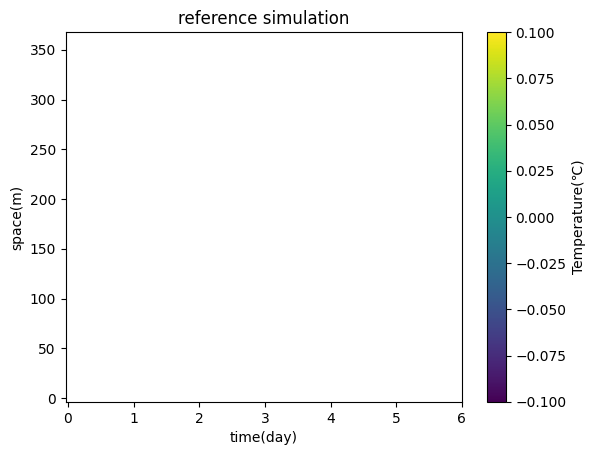

In [69]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(X, T, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.1")

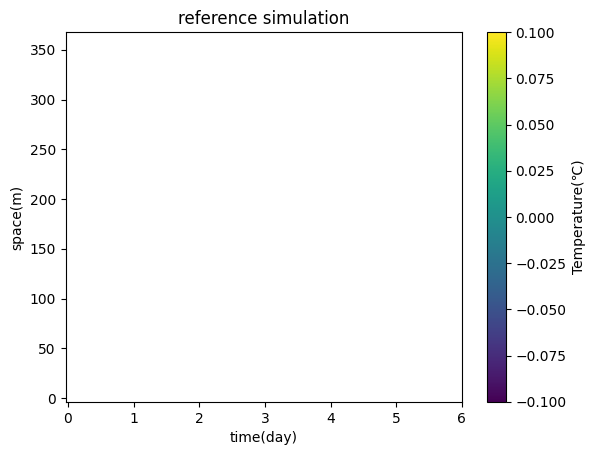

In [70]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(X, T, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.1.png")

In [71]:
data = np.genfromtxt("permafrost_1.1.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,0], data[:,1])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,0], data[:,1])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

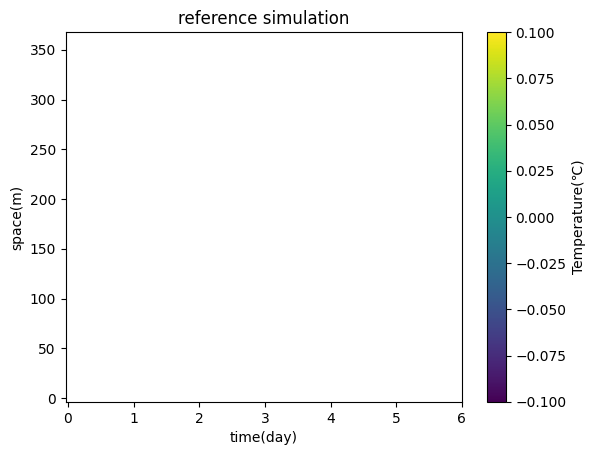

In [72]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(X, T, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.1.png")

In [73]:
x

array([0.025, 0.075, 0.125, ..., 5.75 , 5.85 , 5.95 ])

In [74]:
X

array([[0.025     , 0.14591837, 0.26683673, ..., 5.70816327, 5.82908163,
        5.95      ],
       [0.025     , 0.14591837, 0.26683673, ..., 5.70816327, 5.82908163,
        5.95      ],
       [0.025     , 0.14591837, 0.26683673, ..., 5.70816327, 5.82908163,
        5.95      ],
       ...,
       [0.025     , 0.14591837, 0.26683673, ..., 5.70816327, 5.82908163,
        5.95      ],
       [0.025     , 0.14591837, 0.26683673, ..., 5.70816327, 5.82908163,
        5.95      ],
       [0.025     , 0.14591837, 0.26683673, ..., 5.70816327, 5.82908163,
        5.95      ]])

In [75]:
data = np.genfromtxt("permafrost_1.1.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

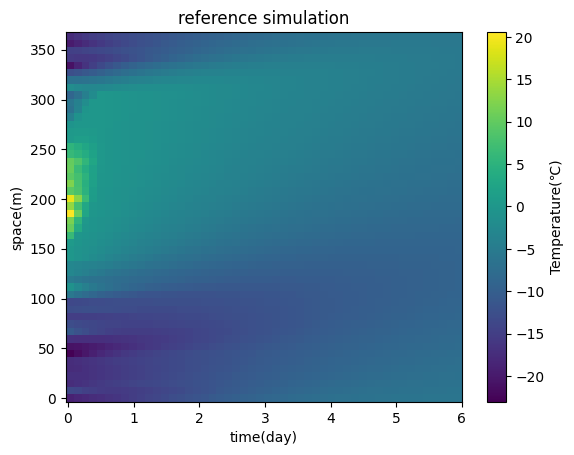

In [76]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(X, T, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.1.png")

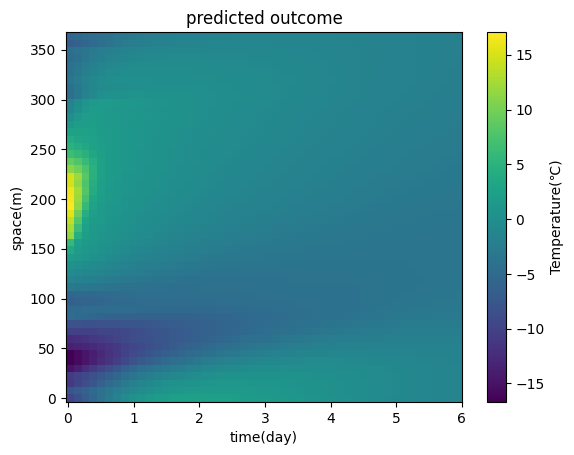

In [77]:
Z = interp2(X, T)
graph1 = plt.pcolormesh(X, T, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.1.png")

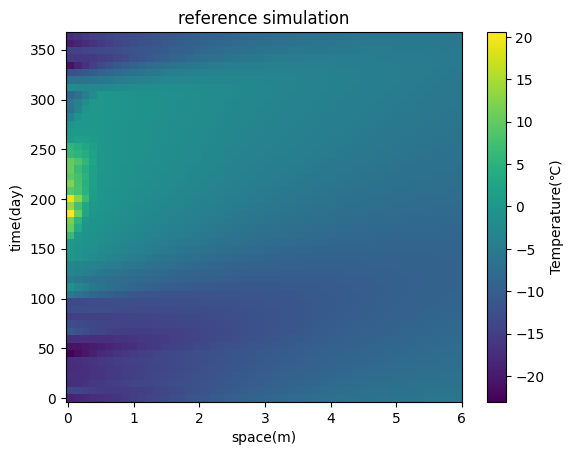

In [78]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(X, T, Z)
plt.ylabel('time(day)')
plt.xlabel('space(m)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.1.png")

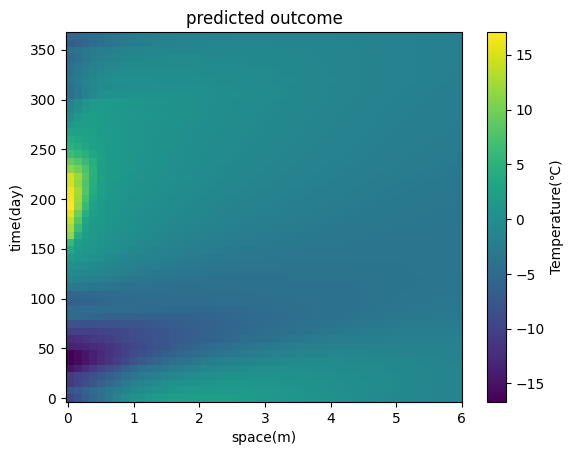

In [79]:
Z = interp2(X, T)
graph1 = plt.pcolormesh(X, T, Z)
plt.ylabel('time(day)')
plt.xlabel('space(m)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.1.png")

In [80]:
data = np.genfromtxt("permafrost_1.1.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(T, X)

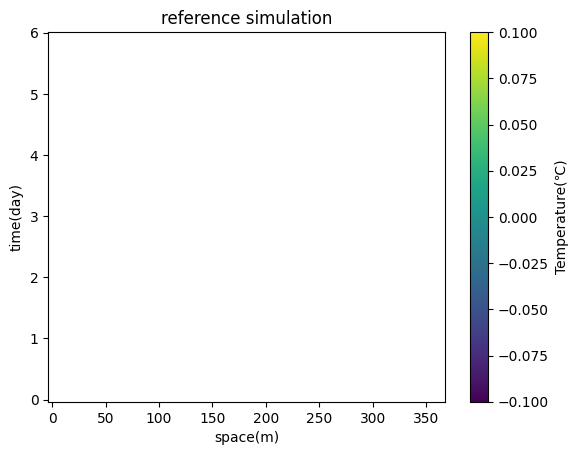

In [81]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(X, T, Z)
plt.ylabel('time(day)')
plt.xlabel('space(m)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.1.png")

In [82]:
data = np.genfromtxt("permafrost_1.1.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
T, X = np.meshgrid(T, X)

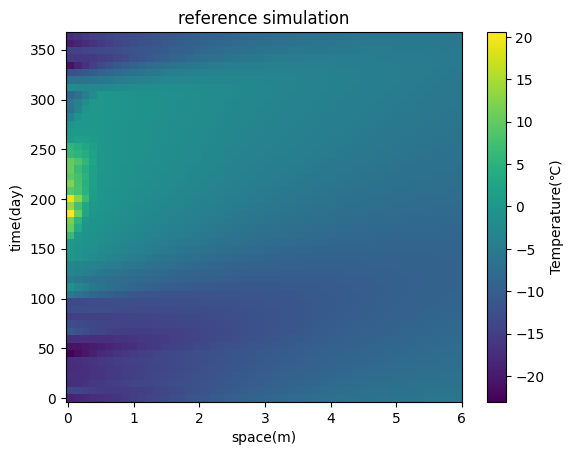

In [83]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(X, T, Z)
plt.ylabel('time(day)')
plt.xlabel('space(m)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.1.png")

In [84]:
data = np.genfromtxt("permafrost_1.1.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

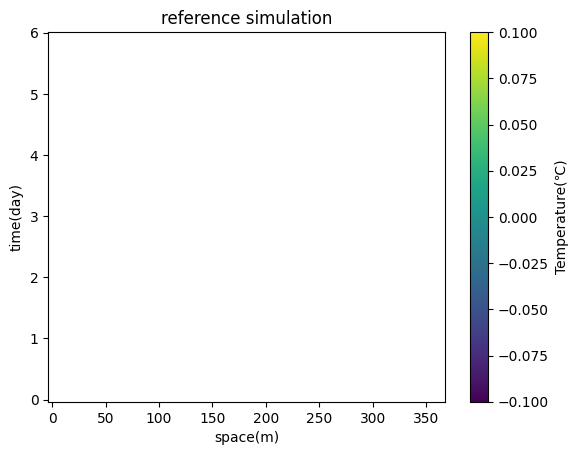

In [85]:
Z = interp1(T, X)
graph1 = plt.pcolormesh(T, X, Z)
plt.ylabel('time(day)')
plt.xlabel('space(m)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.1.png")

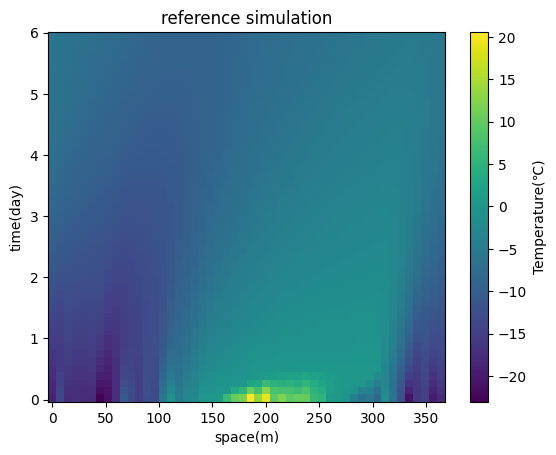

In [86]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.ylabel('time(day)')
plt.xlabel('space(m)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.1.png")

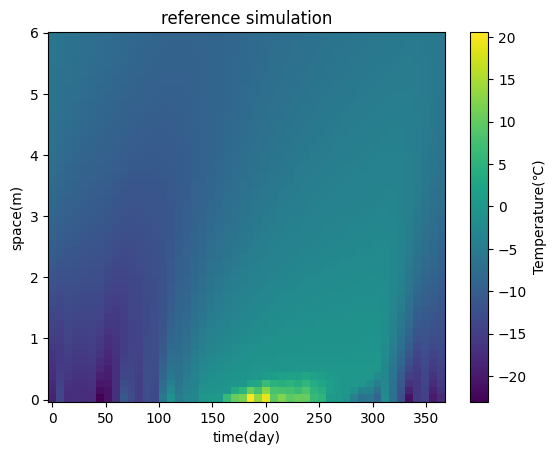

In [87]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.1.png")

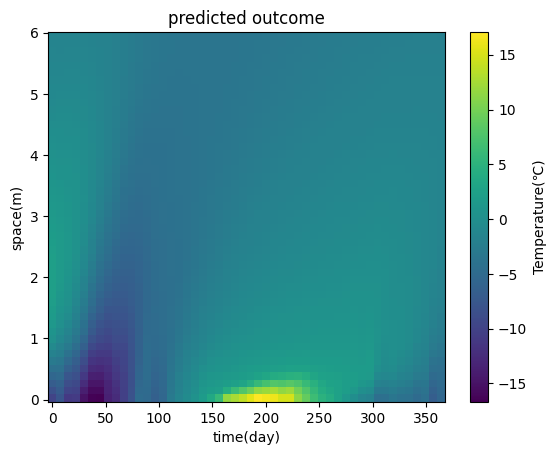

In [88]:
Z = interp2(X, T)
graph2 = plt.pcolormesh(T, X, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph2)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.1.png")

In [89]:
y_predict_arr = y_pred[10].reshape(36500, 1)
y_true_arr = data_y[10].reshape(36500, 1)
np.savetxt("permafrost_1.10.dat", np.hstack((xt, y_true_arr, y_predict_arr)))

In [90]:
data = np.genfromtxt("permafrost_1.10.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

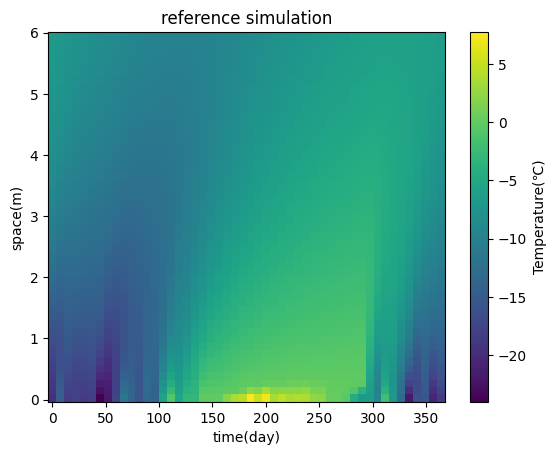

In [91]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.10.png")

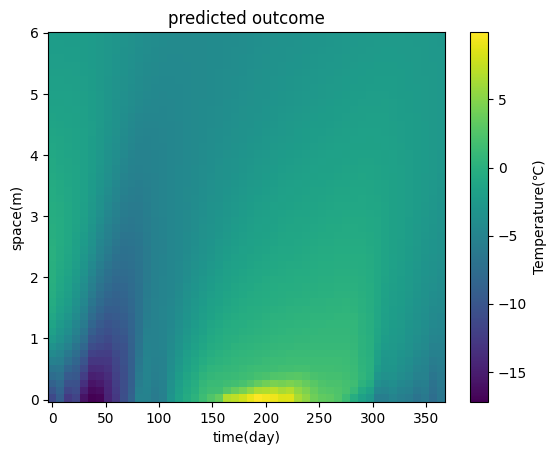

In [92]:
Z = interp2(X, T)
graph2 = plt.pcolormesh(T, X, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph2)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.10.png")

In [93]:
y_predict_arr = y_pred[30].reshape(36500, 1)
y_true_arr = data_y[30].reshape(36500, 1)
np.savetxt("permafrost_1.30.dat", np.hstack((xt, y_true_arr, y_predict_arr)))

In [94]:
data = np.genfromtxt("permafrost_1.30.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

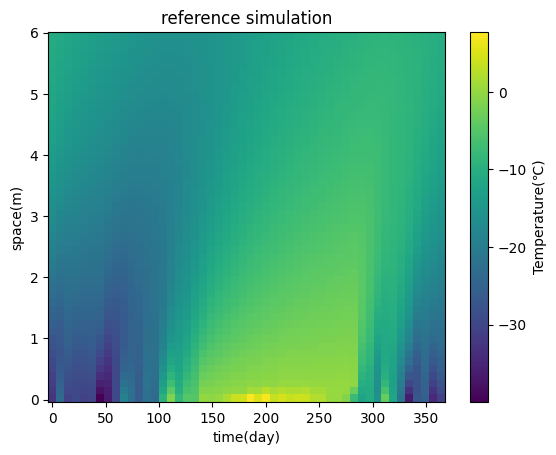

In [95]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.30.png")

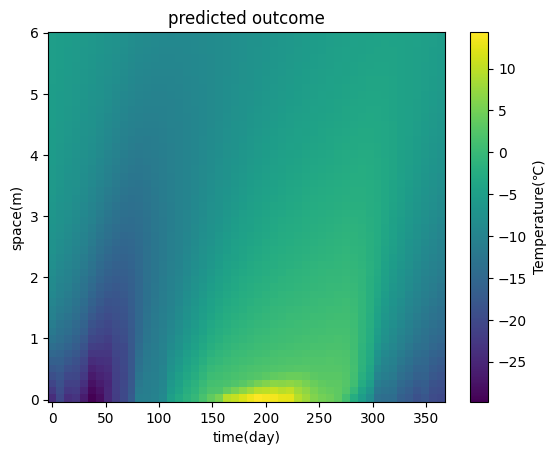

In [96]:
Z = interp2(X, T)
graph2 = plt.pcolormesh(T, X, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph2)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.30.png")

In [97]:
y_predict_arr = y_pred[70].reshape(36500, 1)
y_true_arr = data_y[70].reshape(36500, 1)
np.savetxt("permafrost_1.70.dat", np.hstack((xt, y_true_arr, y_predict_arr)))
data = np.genfromtxt("permafrost_1.70.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

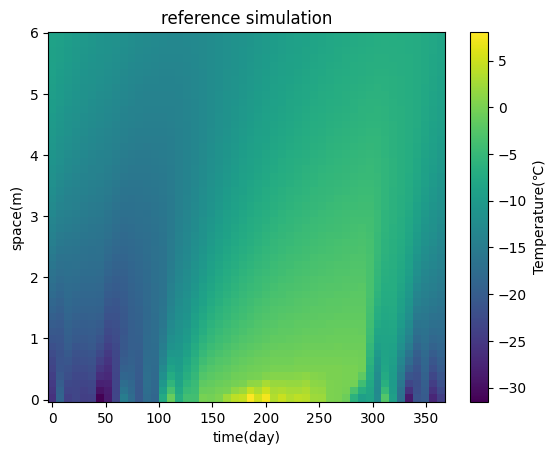

In [98]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.70.png")

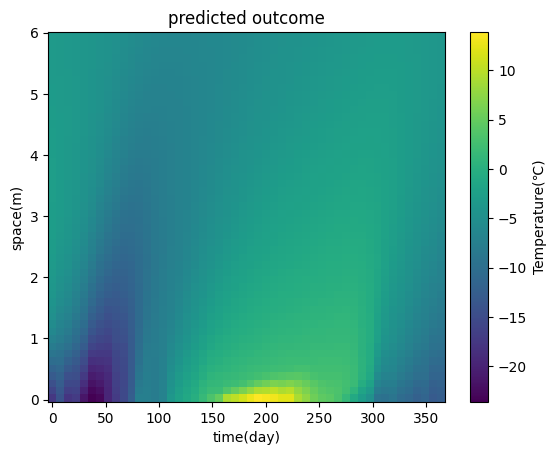

In [99]:
Z = interp2(X, T)
graph2 = plt.pcolormesh(T, X, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph2)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.70.png")

In [100]:
y_predict_arr = y_pred[90].reshape(36500, 1)
y_true_arr = data_y[90].reshape(36500, 1)
np.savetxt("permafrost_1.90.dat", np.hstack((xt, y_true_arr, y_predict_arr)))
data = np.genfromtxt("permafrost_1.90.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

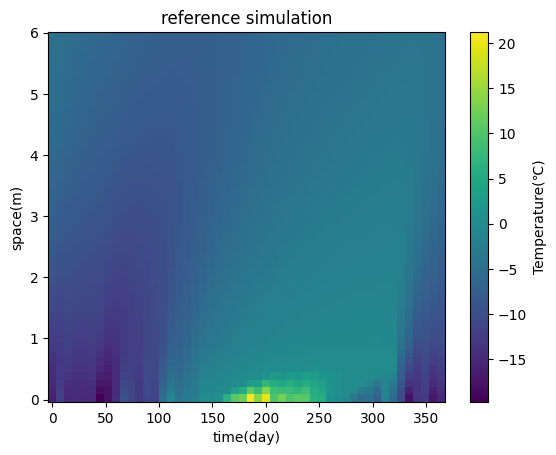

In [101]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.90.png")

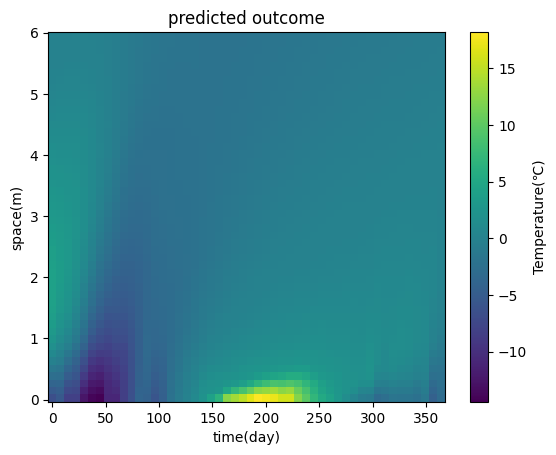

In [102]:
Z = interp2(X, T)
graph2 = plt.pcolormesh(T, X, Z)
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph2)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.90.png")

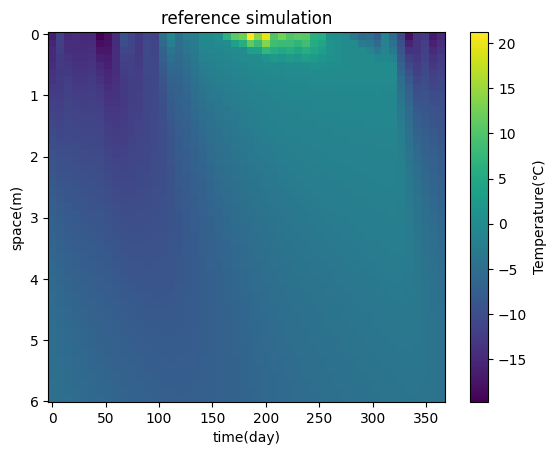

In [103]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.gca().invert_yaxis()
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.90.png")

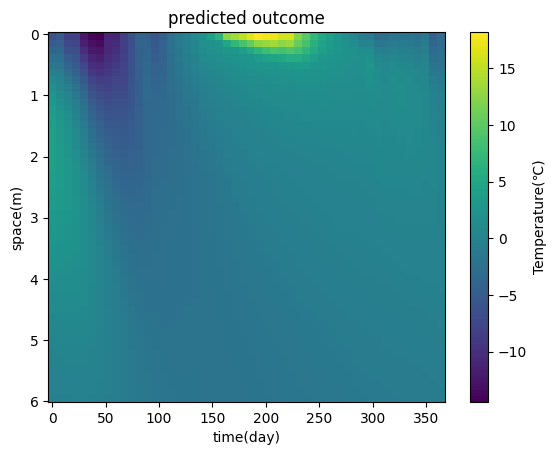

In [104]:
Z = interp2(X, T)
graph2 = plt.pcolormesh(T, X, Z)
plt.gca().invert_yaxis()
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph2)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.90.png")

In [105]:
def plot_data(model=model, data=data, key=10, num_coords=36500, mode = "reference"):
    data_x = data.test_x
    data_y = data.test_y
    y_pred = model.predict(data_x)
    xt = np.zeros((num_coords, 2))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:100]
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]
        xt[q, 1] = tmp_list[q][1]
    y_predict_arr = y_pred[key].reshape(num_coords, 1)
    y_true_arr = data_y[key].reshape(num_coords, 1)
    np.savetxt("permafrost_1.{}.dat".format(key), np.hstack((xt, y_true_arr, y_predict_arr)))
    data = np.genfromtxt("permafrost_1.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data[:,1]
    t = data[:,0]
    X = np.linspace(min(x), max(x))
    T = np.linspace(min(t), max(t))
    X, T = np.meshgrid(X, T)
    # plotting the refernce data
    if mode == "reference":
        interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
        Z = interp1(X, T)
        graph1 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph1)
        colorbar.set_label('Temperature(℃)')
        plt.title("reference simulation")
        plt.savefig("permafrost_reference_1.{}.png".format(key))
    # getting the predicted data
    if mode == "predict":
        interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
        Z = interp2(X, T)
        graph2 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph2)
        colorbar.set_label('Temperature(℃)')
        plt.title("predicted outcome")
        plt.savefig("permafrost_predict_1.{}.png".format(key))

In [106]:
plot_data(model=model, data=data, key=10, num_coords=36500, mode = "reference")

AttributeError: 'numpy.ndarray' object has no attribute 'test_x'

In [107]:
y_predict_arr = y_pred[90].reshape(36500, 1)
y_true_arr = data_y[90].reshape(36500, 1)
np.savetxt("permafrost_1.60.dat", np.hstack((xt, y_true_arr, y_predict_arr)))

In [108]:
data = np.genfromtxt("permafrost_1.60.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

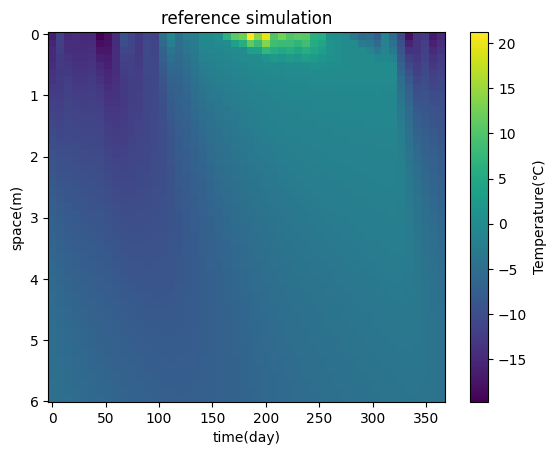

In [109]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.gca().invert_yaxis()
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.60.png")

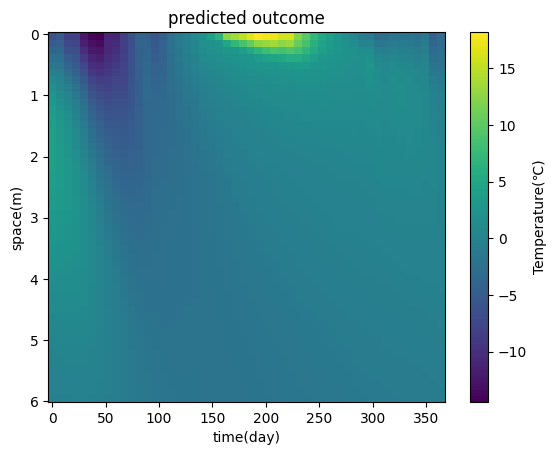

In [110]:
Z = interp2(X, T)
graph2 = plt.pcolormesh(T, X, Z)
plt.gca().invert_yaxis()
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph2)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.60.png")

In [111]:
y_predict_arr = y_pred[90].reshape(36500, 1)
y_true_arr = data_y[90].reshape(36500, 1)
np.savetxt("permafrost_1.40.dat", np.hstack((xt, y_true_arr, y_predict_arr)))
data = np.genfromtxt("permafrost_1.40.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

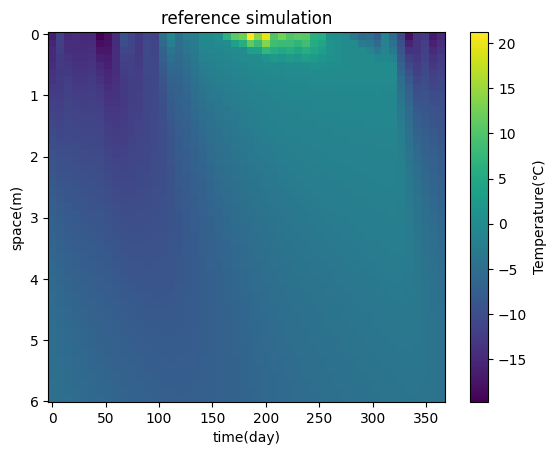

In [112]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.gca().invert_yaxis()
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.40.png")

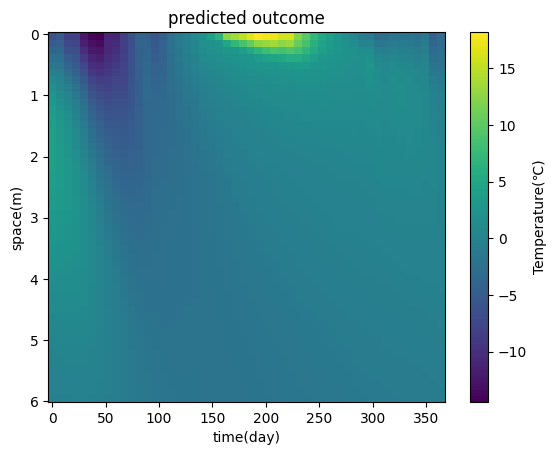

In [113]:
Z = interp2(X, T)
graph2 = plt.pcolormesh(T, X, Z)
plt.gca().invert_yaxis()
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph2)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.40.png")

In [114]:
y_predict_arr = y_pred[90].reshape(36500, 1)
y_true_arr = data_y[90].reshape(36500, 1)
np.savetxt("permafrost_1.20.dat", np.hstack((xt, y_true_arr, y_predict_arr)))
data = np.genfromtxt("permafrost_1.20.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

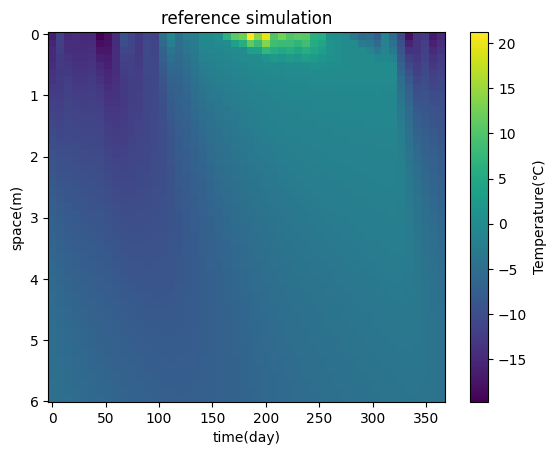

In [115]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.gca().invert_yaxis()
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.20.png")

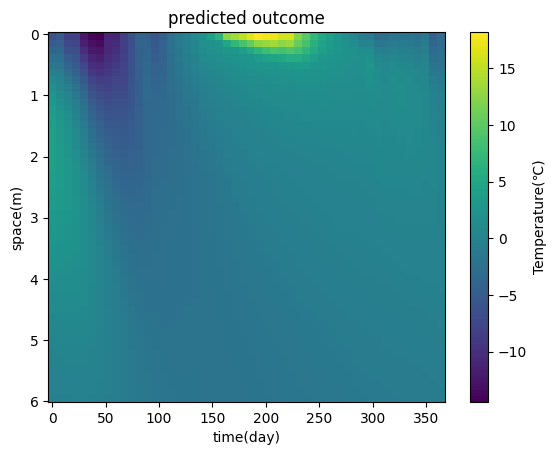

In [116]:
Z = interp2(X, T)
graph2 = plt.pcolormesh(T, X, Z)
plt.gca().invert_yaxis()
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph2)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.20.png")

In [117]:
y_predict_arr = y_pred[90].reshape(36500, 1)
y_true_arr = data_y[90].reshape(36500, 1)
np.savetxt("permafrost_1.5.dat", np.hstack((xt, y_true_arr, y_predict_arr)))
data = np.genfromtxt("permafrost_1.5.dat", delimiter=' ')
# getting the refernce data

interp1 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,2])
# getting the predicted data

interp2 = LinearNDInterpolator(list(zip(data[:,1], data[:,0])), data[:,3])
# constructing the grid

x = data[:,1]
t = data[:,0]
X = np.linspace(min(x), max(x))
T = np.linspace(min(t), max(t))
X, T = np.meshgrid(X, T)

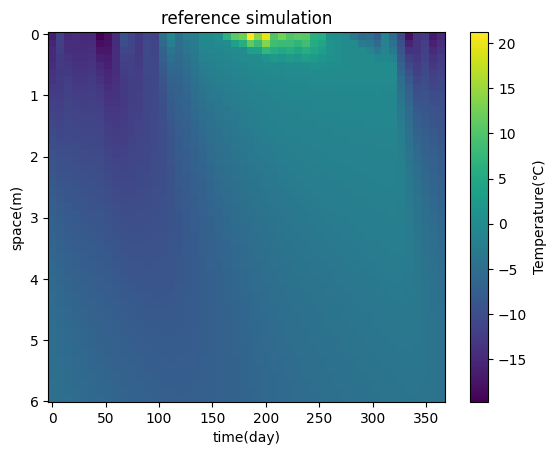

In [118]:
Z = interp1(X, T)
graph1 = plt.pcolormesh(T, X, Z)
plt.gca().invert_yaxis()
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph1)
colorbar.set_label('Temperature(℃)')
plt.title("reference simulation")
plt.savefig("permafrost_reference_1.5.png")

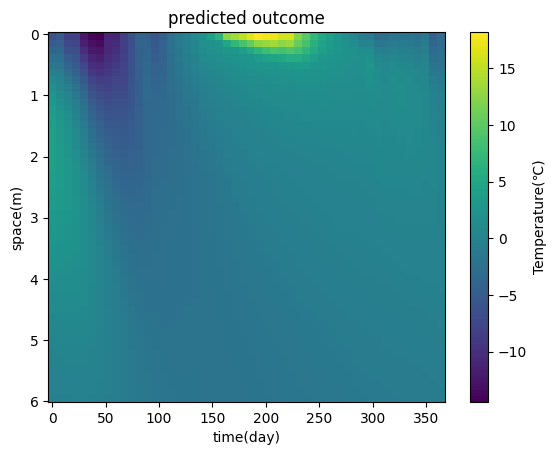

In [119]:
Z = interp2(X, T)
graph2 = plt.pcolormesh(T, X, Z)
plt.gca().invert_yaxis()
plt.ylabel('space(m)')
plt.xlabel('time(day)')
colorbar = plt.colorbar(graph2)
colorbar.set_label('Temperature(℃)')
plt.title("predicted outcome")
plt.savefig("permafrost_predict_1.5.png")

In [120]:
space_coords = dataset["T"].coords["z"].values[0:150]

In [121]:
space_coords[-1]

11.9

In [122]:
def generate_train_data(num=900, num_coords=36500, num_run = 100, num_time=9, num_space=150, num_params = 13, num_input=365, time_span=365, space_span=11.9):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [123]:
def generate_test_data(num=100, num_coords=36500, num_run = 100, num_time=1, num_space=150, num_params = 13, num_input=365, time_span=365, space_span=11.9):
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [124]:
x_test, y_test = generate_test_data()

ValueError: cannot reshape array of size 54750 into shape (36500,1)

In [125]:
def generate_train_data(num_run = 100, num_time=9, num_space=150, num_params = 13, num_input=365, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [126]:
def generate_test_data(num_run = 100, num_time=1, num_space=150, num_params = 13, num_input=365, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [127]:
x_test, y_test = generate_test_data()

<ipython-input-126-2f9653c13f04>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


In [128]:
x_test[0].shape

(100, 378)

In [129]:
x_test[1].shape

(54750, 2)

In [130]:
y_test.shape

(100, 54750)

In [131]:
def train_DeepONet(nx=378, num_epochs=70000):
    x_train, y_train = generate_train_data()
    x_test, y_test = generate_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 1024, 1024], [2, 512, 1024, 1024, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=8000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [133]:
def train_DeepONet(nx=378, num_epochs=70000):
    x_train, y_train = generate_train_data()
    x_test, y_test = generate_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=8000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [134]:
model1, data1 = train_DeepONet()

<ipython-input-125-d6b9cf667413>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


Compiling model...
'compile' took 0.002796 s

Training model...

0         [2.88e+03]    [2.90e+03]    [9.86e+00]    
1000      [1.42e+01]    [2.07e+01]    [6.29e-01]    
2000      [1.53e+01]    [1.67e+01]    [8.56e-01]    
3000      [3.61e+00]    [8.96e+00]    [3.55e-01]    
4000      [2.11e+00]    [4.39e+00]    [2.52e-01]    
5000      [2.18e+00]    [1.74e+01]    [6.37e-01]    
6000      [6.42e-01]    [1.94e+01]    [6.61e-01]    
7000      [5.79e-01]    [2.26e+01]    [7.27e-01]    
8000      [4.86e-01]    [2.35e+01]    [7.29e-01]    
9000      [5.30e-01]    [2.88e+01]    [8.18e-01]    
10000     [9.00e-01]    [3.24e+01]    [8.78e-01]    
11000     [5.26e-01]    [2.37e+01]    [7.47e-01]    
12000     [3.69e-01]    [2.37e+01]    [7.49e-01]    
Epoch 12000: early stopping

Best model at step 12000:
  train loss: 3.69e-01
  test loss: 2.37e+01
  test metric: [7.49e-01]

'train' took 1235.185220 s



In [135]:
def plot_data(model=model1, data=data1, key=10, num_coords=36500, mode = "reference"):
    data_x = data1.test_x
    data_y = data1.test_y
    y_pred = model1.predict(data_x)
    xt = np.zeros((num_coords, 2))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:100]
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]
        xt[q, 1] = tmp_list[q][1]
    y_predict_arr = y_pred[key].reshape(num_coords, 1)
    y_true_arr = data_y[key].reshape(num_coords, 1)
    np.savetxt("permafrost_1.{}.dat".format(key), np.hstack((xt, y_true_arr, y_predict_arr)))
    data_plot = np.genfromtxt("permafrost_1.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    X = np.linspace(min(x), max(x))
    T = np.linspace(min(t), max(t))
    X, T = np.meshgrid(X, T)
    # plotting the refernce data
    if mode == "reference":
        interp1 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,2])
        Z = interp1(X, T)
        graph1 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph1)
        colorbar.set_label('Temperature(℃)')
        plt.title("reference simulation")
        plt.savefig("permafrost_reference_1.{}.png".format(key))
    # getting the predicted data
    if mode == "predict":
        interp2 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,3])
        Z = interp2(X, T)
        graph2 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph2)
        colorbar.set_label('Temperature(℃)')
        plt.title("predicted outcome")
        plt.savefig("permafrost_predict_1.{}.png".format(key))

In [136]:
def plot_data(model=model1, data=data1, key=10, num_coords=54750, num_space = 150, mode = "reference"):
    data_x = data1.test_x
    data_y = data1.test_y
    y_pred = model1.predict(data_x)
    xt = np.zeros((num_coords, 2))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]
        xt[q, 1] = tmp_list[q][1]
    y_predict_arr = y_pred[key].reshape(num_coords, 1)
    y_true_arr = data_y[key].reshape(num_coords, 1)
    np.savetxt("permafrost_1.{}.dat".format(key), np.hstack((xt, y_true_arr, y_predict_arr)))
    data_plot = np.genfromtxt("permafrost_1.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    X = np.linspace(min(x), max(x))
    T = np.linspace(min(t), max(t))
    X, T = np.meshgrid(X, T)
    # plotting the refernce data
    if mode == "reference":
        interp1 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,2])
        Z = interp1(X, T)
        graph1 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph1)
        colorbar.set_label('Temperature(℃)')
        plt.title("reference simulation")
        plt.savefig("permafrost_reference_1.{}.png".format(key))
    # getting the predicted data
    if mode == "predict":
        interp2 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,3])
        Z = interp2(X, T)
        graph2 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph2)
        colorbar.set_label('Temperature(℃)')
        plt.title("predicted outcome")
        plt.savefig("permafrost_predict_1.{}.png".format(key))

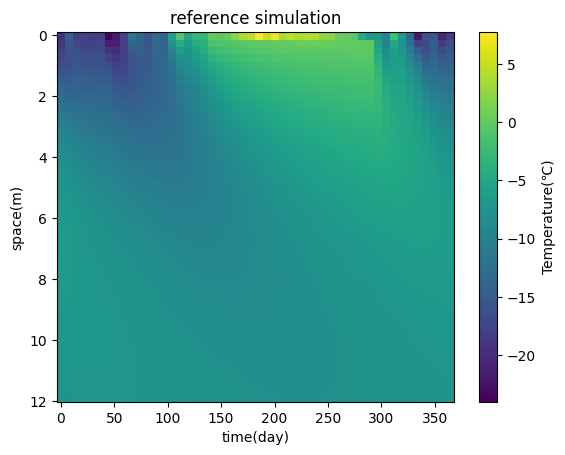

In [137]:
plot_data(model=model1, data=data1, key=10, mode = "reference")

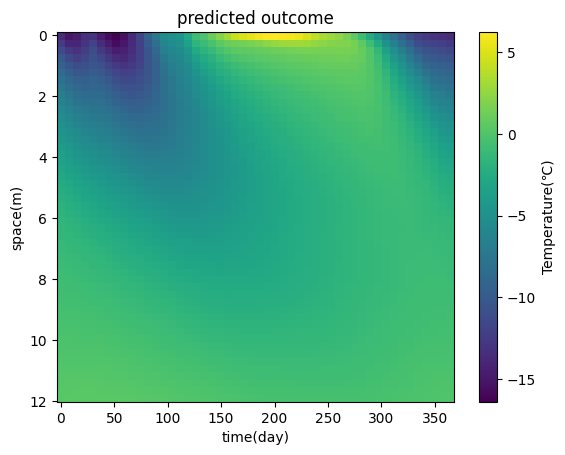

In [138]:
plot_data(model=model1, data=data1, key=10, mode = "predict")

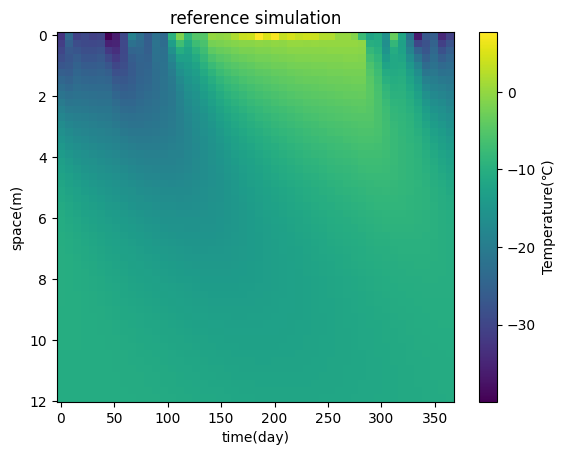

In [139]:
plot_data(model=model1, data=data1, key=30, mode = "reference")

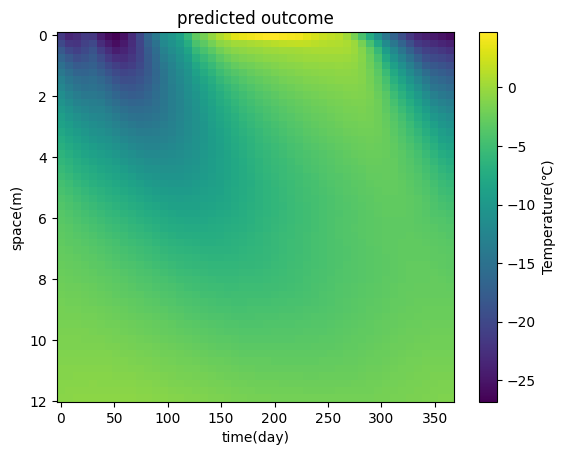

In [140]:
plot_data(model=model1, data=data1, key=30, mode = "predict")

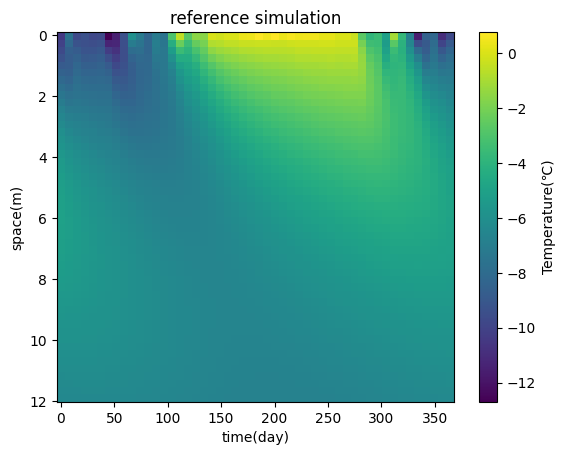

In [141]:
plot_data(model=model1, data=data1, key=60, mode = "reference")

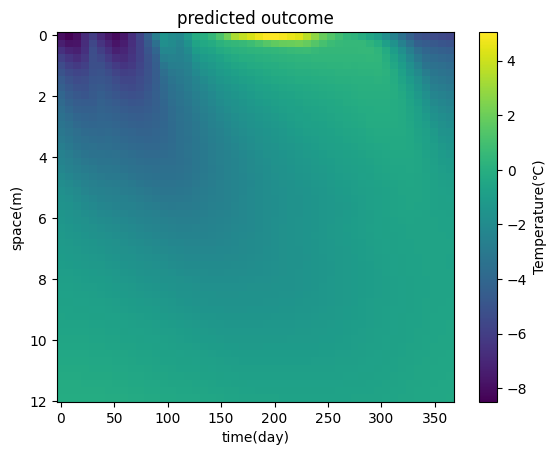

In [142]:
plot_data(model=model1, data=data1, key=60, mode = "predict")

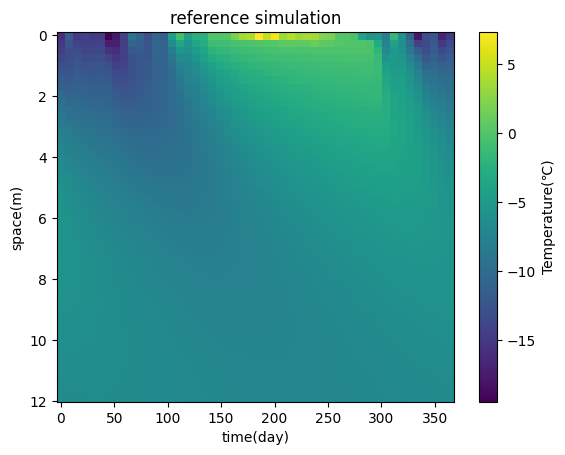

In [143]:
plot_data(model=model1, data=data1, key=85, mode = "reference")

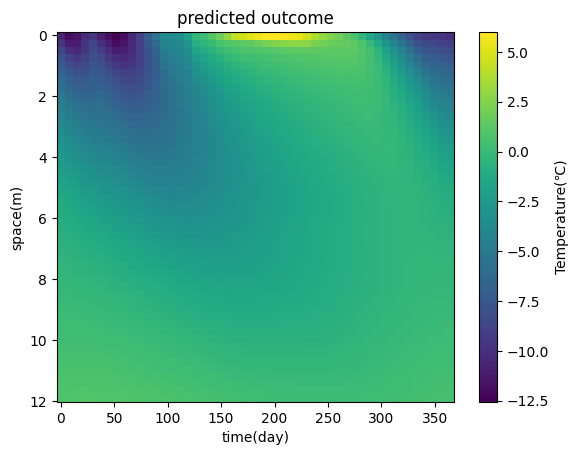

In [144]:
plot_data(model=model1, data=data1, key=85, mode = "predict")

In [145]:
def generate_train_data(num_run = 100, num_time=9, num_space=150, num_params = 13, num_input=73, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):(time_span/num_input)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [146]:
def generate_test_data(num_run = 100, num_time=1, num_space=150, num_params = 13, num_input=73, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773:(time_span/num_input)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [147]:
def train_DeepONet(nx=378, num_epochs=50000):
    x_train, y_train = generate_train_data()
    x_test, y_test = generate_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [148]:
model1, data1 = train_DeepONet()

TypeError: slice indices must be integers or None or have an __index__ method

In [149]:
def generate_train_data(num_run = 100, num_time=9, num_space=150, num_params = 13, num_input=73, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):int(time_span/num_input)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [150]:
def generate_test_data(num_run = 100, num_time=1, num_space=150, num_params = 13, num_input=73, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773:int(time_span/num_input)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [151]:
def train_DeepONet(nx=378, num_epochs=50000):
    x_train, y_train = generate_train_data()
    x_test, y_test = generate_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [153]:
def train_DeepONet(nx=86, num_epochs=50000):
    x_train, y_train = generate_train_data()
    x_test, y_test = generate_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [154]:
model1, data1 = train_DeepONet()

<ipython-input-149-33f0d253b90b>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


Compiling model...
'compile' took 0.004944 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.85e+03]    [3.94e+03]    [1.16e+01]    
1000      [2.04e+01]    [3.26e+01]    [6.43e-01]    
2000      [1.26e+00]    [3.14e+01]    [8.41e-01]    
3000      [1.28e+00]    [3.58e+01]    [9.46e-01]    
4000      [2.28e+00]    [4.12e+01]    [1.00e+00]    
5000      [6.14e-01]    [2.94e+01]    [8.85e-01]    
6000      [7.21e-01]    [2.74e+01]    [8.68e-01]    
7000      [7.86e-01]    [3.48e+01]    [9.89e-01]    
8000      [1.40e+00]    [3.82e+01]    [1.01e+00]    


In [1]:
import numpy as np

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import deepxde as dde
from deepxde.backend import tf
from scipy.interpolate import LinearNDInterpolator
import xarray as xr
import pandas as pd

2023-09-14 11:23:05.102622: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 11:23:43.913959: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Enable just-in-time compilation with XLA.



In [3]:
dataset = xr.load_dataset("data/cglite_freeW_ERA_MKL_2010-2020/cglite_freeW_ERA_MKL_2010-2020.nc")
input_data = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/input_data.csv")
parameters = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/parameters.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn/scripts/python/data/cglite_freeW_ERA_MKL_2010-2020/cglite_freeW_ERA_MKL_2010-2020.nc'

In [4]:
pwd

'/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn/scripts/python'

In [5]:
cd ..

/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn/scripts


In [6]:
cd ..

/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn


In [7]:
cd ..

/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace


In [8]:
dataset = xr.load_dataset("data/cglite_freeW_ERA_MKL_2010-2020/cglite_freeW_ERA_MKL_2010-2020.nc")
input_data = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/input_data.csv")
parameters = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/parameters.csv")

In [9]:
def generate_train_data(num_run = 100, num_time=9, num_space=150, num_params = 13, num_input=73, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):int(time_span/num_input)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [10]:
def generate_test_data(num_run = 100, num_time=1, num_space=150, num_params = 13, num_input=73, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773:int(time_span/num_input)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [11]:
def train_DeepONet(nx=86, num_epochs=50000):
    x_train, y_train = generate_train_data()
    x_test, y_test = generate_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [12]:
model1, data1 = train_DeepONet()

<ipython-input-9-33f0d253b90b>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]
2023-09-14 11:32:45.384315: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-09-14 11:32:45.384381: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38370 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-09-14 11:32:45.401069: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-09-14

Compiling model...
'compile' took 0.688400 s

Training model...



/home/guest/lizhen001/anaconda3/envs/cryopinn/lib/python3.11/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
2023-09-14 11:32:47.992128: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55885ffba7b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-14 11:32:47.992183: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2023-09-14 11:32:47.992191: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (1): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2023-09-14 11:32:47.992197: I tensorflow/compiler/xla/service/service.cc:177

Step      Train loss    Test loss     Test metric   
0         [2.38e+03]    [2.35e+03]    [8.82e+00]    
1000      [2.05e+01]    [2.25e+01]    [8.31e-01]    
2000      [1.19e+00]    [4.01e+01]    [1.27e+00]    
3000      [1.06e+00]    [2.73e+01]    [1.05e+00]    
4000      [6.43e-01]    [2.93e+01]    [1.11e+00]    
5000      [1.05e+00]    [2.45e+01]    [1.08e+00]    
6000      [4.99e-01]    [1.83e+01]    [9.32e-01]    
7000      [5.42e-01]    [1.91e+01]    [9.48e-01]    
8000      [6.51e-01]    [1.35e+01]    [7.94e-01]    
9000      [4.27e-01]    [1.37e+01]    [7.98e-01]    
10000     [6.19e-01]    [1.17e+01]    [7.34e-01]    
11000     [6.53e-01]    [1.04e+01]    [6.91e-01]    
12000     [4.24e-01]    [1.05e+01]    [6.96e-01]    
13000     [2.63e-01]    [1.13e+01]    [7.14e-01]    
14000     [2.88e-01]    [1.06e+01]    [6.88e-01]    
15000     [2.75e-01]    [1.04e+01]    [6.80e-01]    
16000     [3.13e-01]    [9.86e+00]    [6.59e-01]    
17000     [2.25e-01]    [1.04e+01]    [6.73e-0

In [13]:
def plot_data(model=model1, data=data1, key=10, num_coords=54750, num_space = 150, mode = "reference"):
    data_x = data1.test_x
    data_y = data1.test_y
    y_pred = model1.predict(data_x)
    xt = np.zeros((num_coords, 2))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]
        xt[q, 1] = tmp_list[q][1]
    y_predict_arr = y_pred[key].reshape(num_coords, 1)
    y_true_arr = data_y[key].reshape(num_coords, 1)
    np.savetxt("permafrost_2.{}.dat".format(key), np.hstack((xt, y_true_arr, y_predict_arr)))
    data_plot = np.genfromtxt("permafrost_2.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    X = np.linspace(min(x), max(x))
    T = np.linspace(min(t), max(t))
    X, T = np.meshgrid(X, T)
    # plotting the refernce data
    if mode == "reference":
        interp1 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,2])
        Z = interp1(X, T)
        graph1 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph1)
        colorbar.set_label('Temperature(℃)')
        plt.title("reference simulation")
        plt.savefig("permafrost_reference_2.{}.png".format(key))
    # getting the predicted data
    if mode == "predict":
        interp2 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,3])
        Z = interp2(X, T)
        graph2 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph2)
        colorbar.set_label('Temperature(℃)')
        plt.title("predicted outcome")
        plt.savefig("permafrost_predict_2.{}.png".format(key))

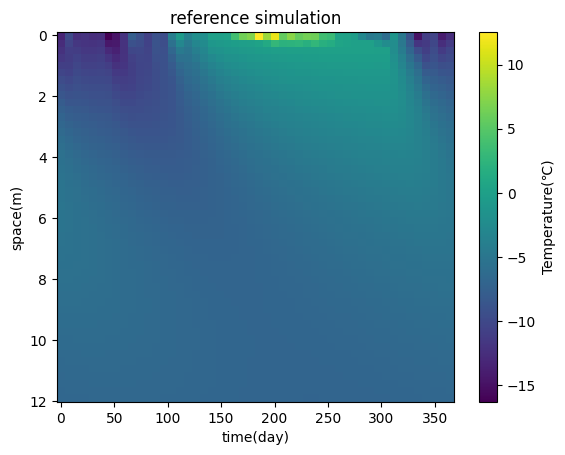

In [14]:
plot_data(model=model1, data=data1, key=5, mode = "reference")

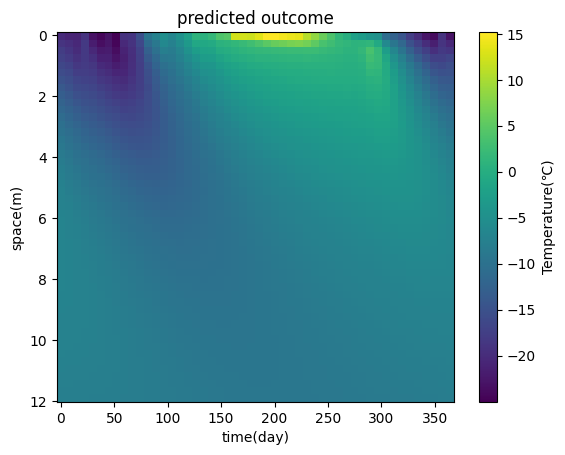

In [15]:
plot_data(model=model1, data=data1, key=5, mode = "predict")

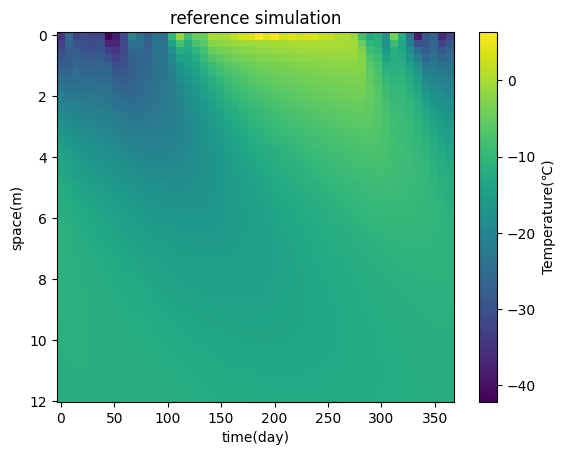

In [16]:
plot_data(model=model1, data=data1, key=20, mode = "reference")

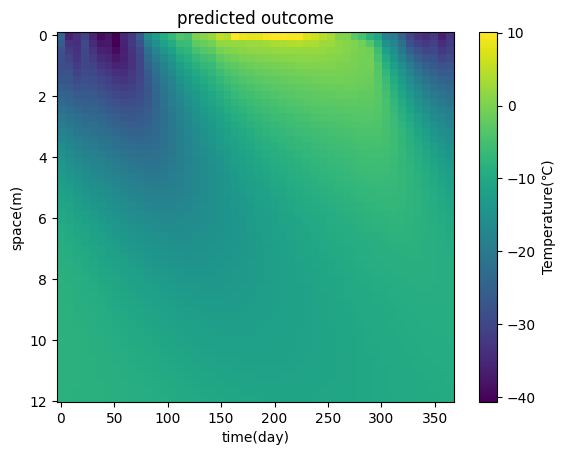

In [17]:
plot_data(model=model1, data=data1, key=20, mode = "predict")

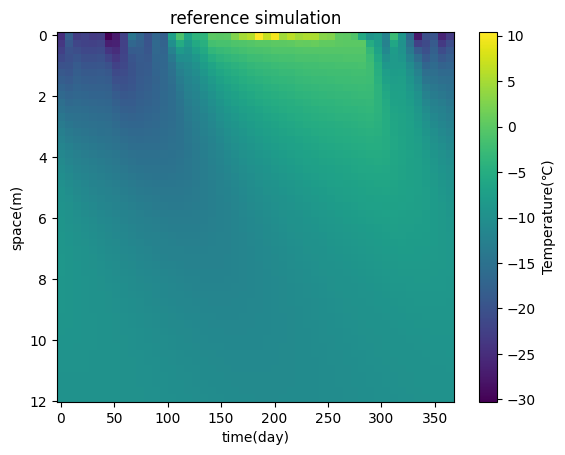

In [18]:
plot_data(model=model1, data=data1, key=40, mode = "reference")

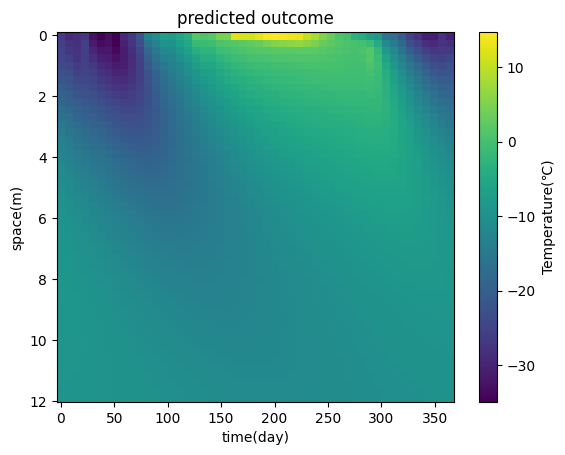

In [19]:
plot_data(model=model1, data=data1, key=40, mode = "predict")

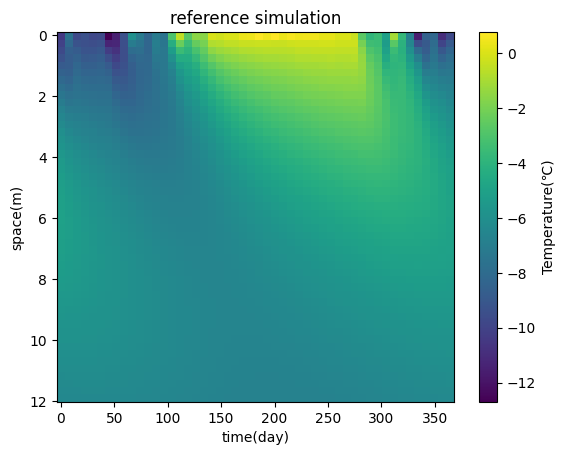

In [20]:
plot_data(model=model1, data=data1, key=60, mode = "reference")

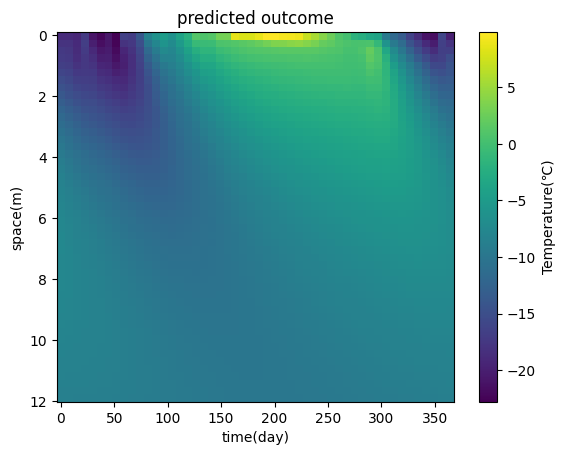

In [21]:
plot_data(model=model1, data=data1, key=60, mode = "predict")

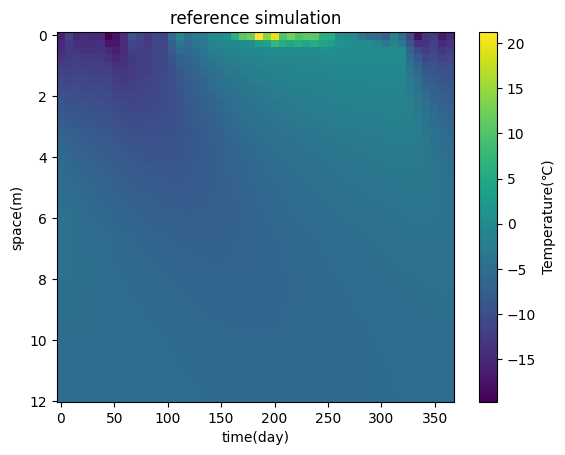

In [22]:
plot_data(model=model1, data=data1, key=90, mode = "reference")

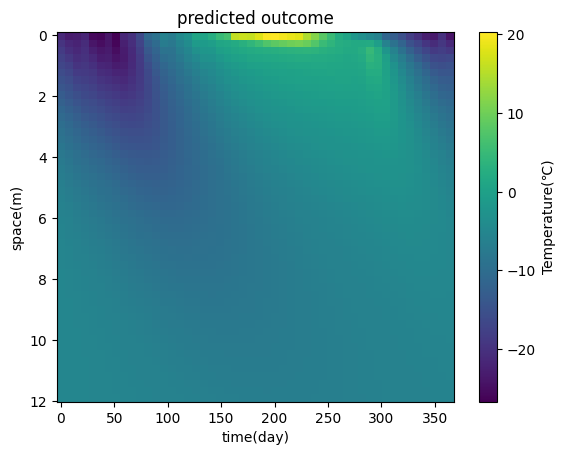

In [23]:
plot_data(model=model1, data=data1, key=90, mode = "predict")

In [24]:
def train_DeepONet(nx=86, num_epochs=50000, func_train_data = generate_train_data, func_test_data = generate_test_data):
    x_train, y_train = func_train_data()
    x_test, y_test = func_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)

In [25]:
def train_DeepONet(nx=86, num_epochs=50000, func_train_data = generate_train_data, func_test_data = generate_test_data):
    x_train, y_train = func_train_data()
    x_test, y_test = func_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [26]:
def generate_train_data_without_boundary(num_run = 100, num_time=9, num_space=150, num_params = 13, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    num_u0 = num_params
    data_T = dataset["T"].values
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [27]:
def generate_test_data_without_boundary(num_run = 100, num_time=1, num_space=150, num_params = 13, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    num_u0 = num_params
    data_T = dataset["T"].values
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [28]:
model2, data2 = train_DeepONet(nx=13, num_epochs=50000, func_train_data = generate_train_data_without_boundary, func_test_data = generate_test_data_without_boundary)

<ipython-input-26-83a52bc36a73>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


Compiling model...
'compile' took 0.002545 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.59e+03]    [2.61e+03]    [9.31e+00]    
1000      [2.69e+01]    [2.42e+01]    [1.00e+00]    
2000      [2.58e+00]    [2.74e+00]    [2.32e-01]    
3000      [1.59e+00]    [1.54e+00]    [1.64e-01]    
4000      [1.63e+00]    [1.61e+00]    [1.69e-01]    
5000      [1.67e+00]    [1.64e+00]    [1.73e-01]    
6000      [1.38e+00]    [1.14e+00]    [1.50e-01]    
7000      [1.43e+00]    [1.10e+00]    [1.60e-01]    
8000      [1.42e+00]    [1.28e+00]    [1.49e-01]    
9000      [1.33e+00]    [1.05e+00]    [1.43e-01]    
10000     [1.32e+00]    [1.01e+00]    [1.42e-01]    
11000     [1.30e+00]    [1.03e+00]    [1.39e-01]    
12000     [1.30e+00]    [1.01e+00]    [1.37e-01]    
13000     [1.29e+00]    [1.01e+00]    [1.37e-01]    
14000     [1.30e+00]    [1.05e+00]    [1.35e-01]    
15000     [1.47e+00]    [1.03e+00]    [1.65e-01]    
16000     [1.28e+00]    [9.91e-01]

In [29]:
def plot_data(model=model1, data=data1, key=10, num_coords=54750, num_space = 150, mode = "reference"):
    data_x = data1.test_x
    data_y = data1.test_y
    y_pred = model1.predict(data_x)
    xt = np.zeros((num_coords, 2))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]
        xt[q, 1] = tmp_list[q][1]
    y_predict_arr = y_pred[key].reshape(num_coords, 1)
    y_true_arr = data_y[key].reshape(num_coords, 1)
    np.savetxt("permafrost_2.{}.dat".format(key), np.hstack((xt, y_true_arr, y_predict_arr)))
    data_plot = np.genfromtxt("permafrost_2.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    X = np.linspace(min(x), max(x))
    T = np.linspace(min(t), max(t))
    X, T = np.meshgrid(X, T)
    # plotting the refernce data
    if mode == "reference":
        interp1 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,2])
        Z = interp1(X, T)
        graph1 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph1)
        colorbar.set_label('Temperature(℃)')
        plt.title("reference simulation")
        plt.savefig("permafrost_reference_2.{}.png".format(key))
    # getting the predicted data
    if mode == "predict":
        interp2 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,3])
        Z = interp2(X, T)
        graph2 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph2)
        colorbar.set_label('Temperature(℃)')
        plt.title("predicted outcome")
        plt.savefig("permafrost_predict_2.{}.png".format(key))

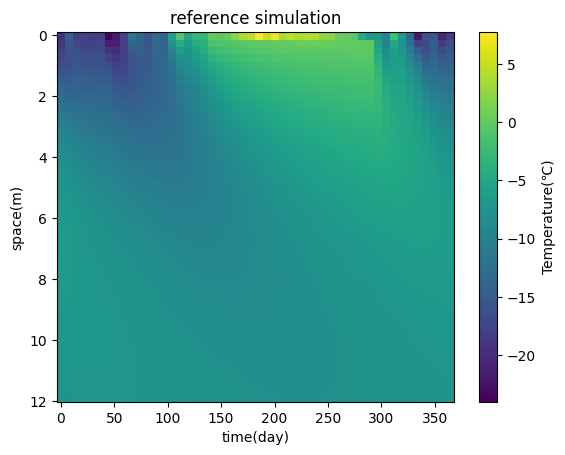

In [30]:
plot_data(model=model2, data=data2, key=10, mode = "reference")

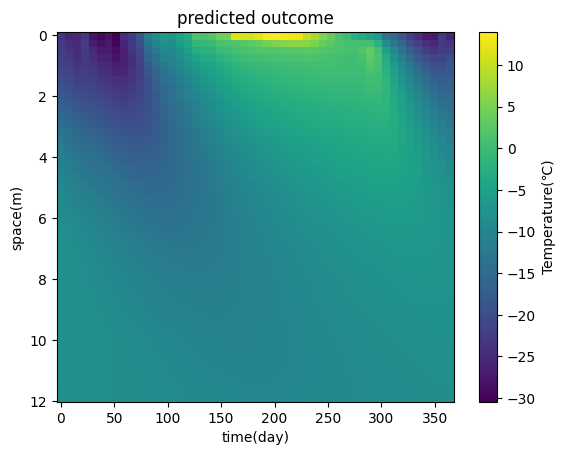

In [31]:
plot_data(model=model2, data=data2, key=10, mode = "predict")

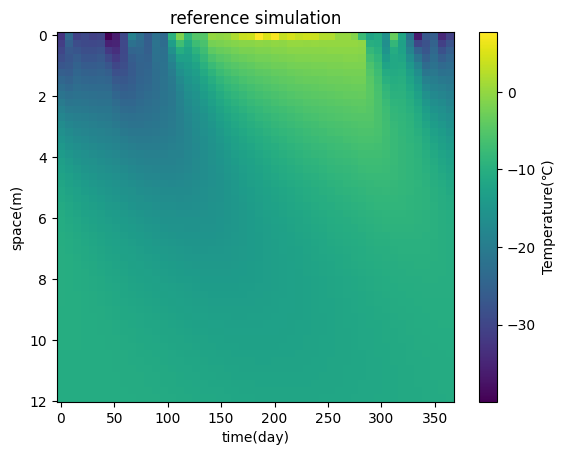

In [32]:
plot_data(model=model2, data=data2, key=30, mode = "reference")

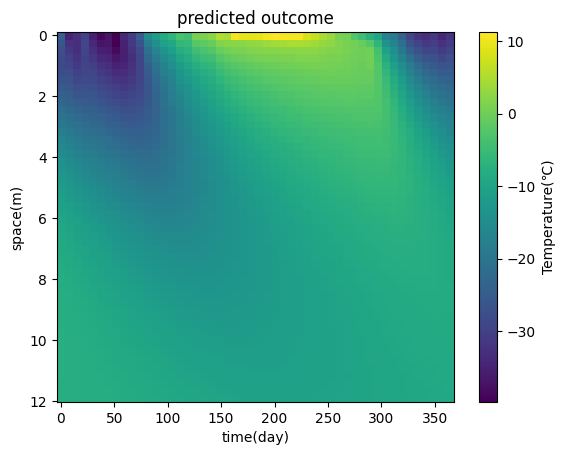

In [33]:
plot_data(model=model2, data=data2, key=30, mode = "predict")

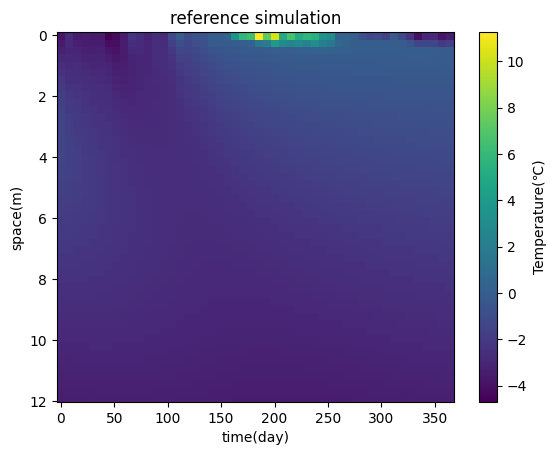

In [34]:
plot_data(model=model2, data=data2, key=50, mode = "reference")

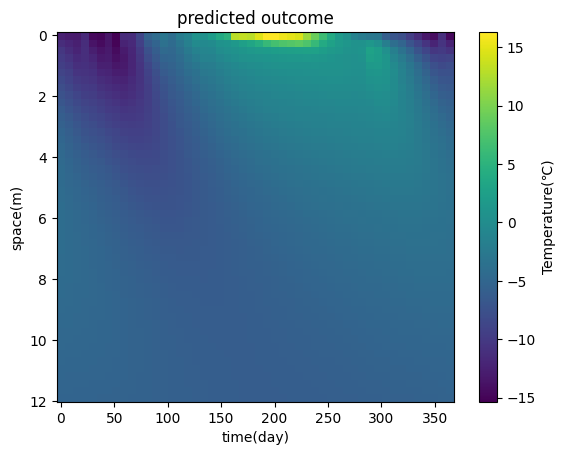

In [35]:
plot_data(model=model2, data=data2, key=50, mode = "predict")

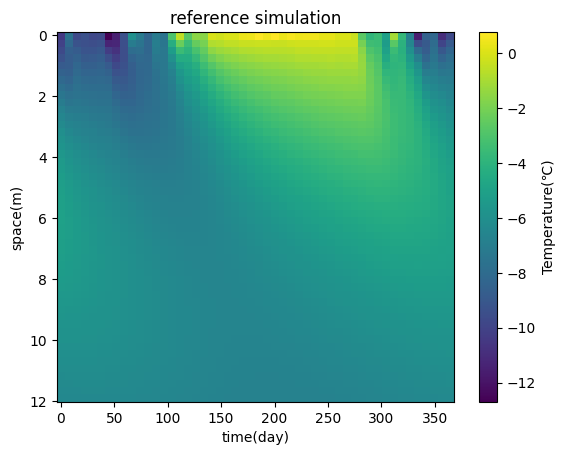

In [36]:
plot_data(model=model2, data=data2, key=60, mode = "reference")

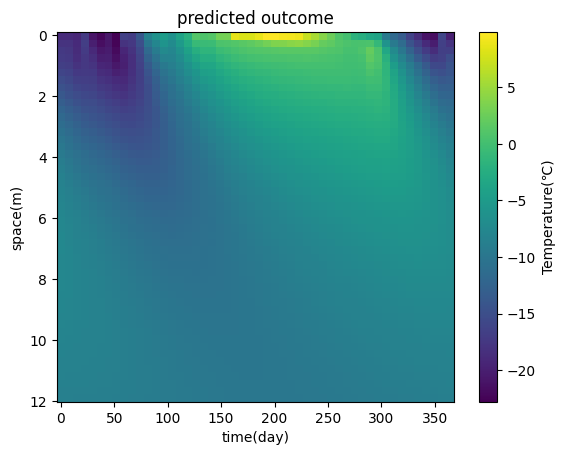

In [37]:
plot_data(model=model2, data=data2, key=60, mode = "predict")

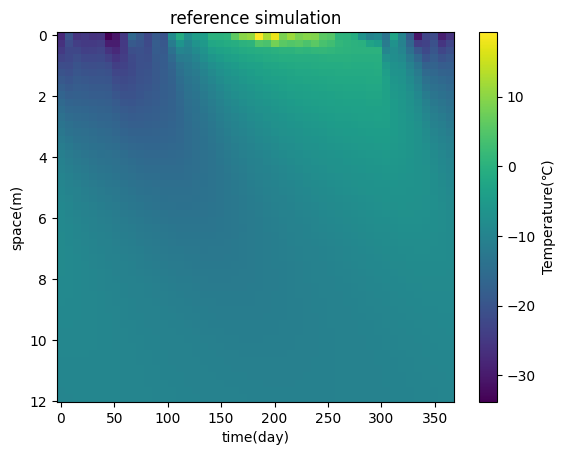

In [38]:
plot_data(model=model2, data=data2, key=80, mode = "reference")

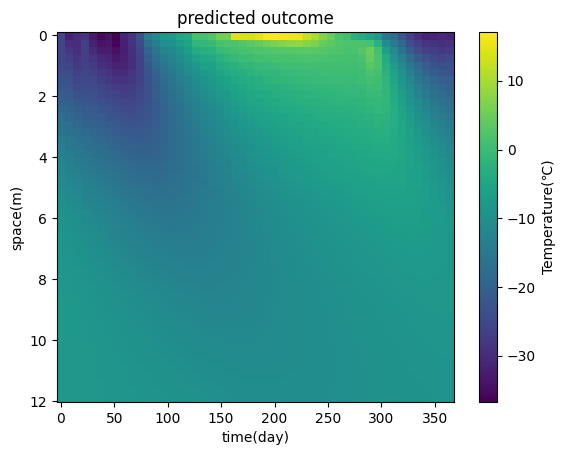

In [39]:
plot_data(model=model2, data=data2, key=80, mode = "predict")

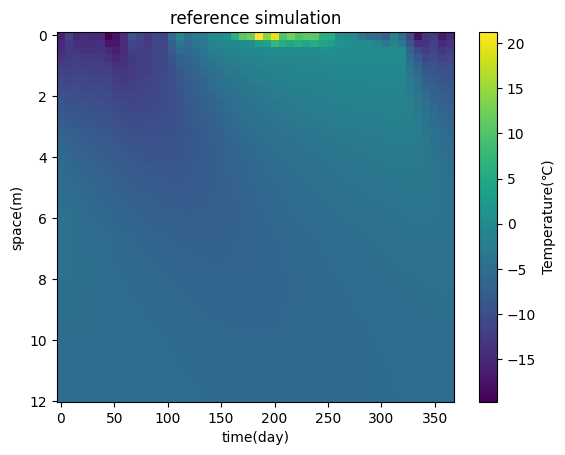

In [40]:
plot_data(model=model2, data=data2, key=90, mode = "reference")

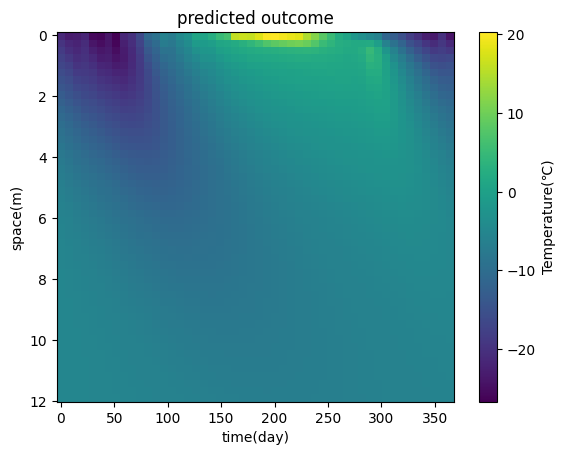

In [41]:
plot_data(model=model2, data=data2, key=90, mode = "predict")

In [42]:
def generate_train_data(num_run = 100, num_time=9, num_space=150, num_params = 13, num_input=365, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):int(time_span/num_input)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [43]:
def generate_test_data(num_run = 100, num_time=1, num_space=150, num_params = 13, num_input=365, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773:int(time_span/num_input)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [44]:
def train_DeepONet(nx=86, num_epochs=50000, func_train_data = generate_train_data, func_test_data = generate_test_data):
    x_train, y_train = func_train_data()
    x_test, y_test = func_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 128, 128, 128, 512], [2, 512, 512, 512, 512], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [45]:
model1, data1 = train_DeepONet()

<ipython-input-42-684e6945caaf>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


Compiling model...
'compile' took 0.002734 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.49e+02]    [1.47e+02]    [1.67e+00]    
1000      [1.46e+01]    [2.42e+01]    [1.15e+00]    
2000      [9.05e+00]    [2.41e+02]    [3.22e+00]    
3000      [8.84e+00]    [8.24e+01]    [2.05e+00]    
4000      [3.11e+00]    [2.13e+02]    [3.01e+00]    
5000      [1.08e+00]    [2.95e+02]    [3.49e+00]    
6000      [9.63e-01]    [2.73e+02]    [3.37e+00]    
7000      [1.96e+00]    [2.79e+02]    [3.42e+00]    
8000      [1.35e+00]    [2.20e+02]    [3.07e+00]    
9000      [8.35e-01]    [2.19e+02]    [3.05e+00]    
10000     [9.50e-01]    [2.13e+02]    [2.99e+00]    
11000     [6.49e-01]    [1.94e+02]    [2.87e+00]    
Epoch 11000: early stopping

Best model at step 11000:
  train loss: 6.49e-01
  test loss: 1.94e+02
  test metric: [2.87e+00]

'train' took 1098.026260 s



In [46]:
def train_DeepONet(nx=13, num_epochs=50000, func_train_data = generate_train_data, func_test_data = generate_test_data):
    x_train, y_train = func_train_data()
    x_test, y_test = func_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 128, 128, 128, 512], [2, 512, 512, 512, 512], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [47]:
model1, data1 = train_DeepONet(nx=378, num_epochs=30000)

<ipython-input-42-684e6945caaf>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


Compiling model...
'compile' took 0.002693 s

Training model...



/home/guest/lizhen001/anaconda3/envs/cryopinn/lib/python3.11/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss    Test loss     Test metric   
0         [1.49e+02]    [1.47e+02]    [1.67e+00]    
1000      [1.46e+01]    [2.42e+01]    [1.15e+00]    
2000      [9.05e+00]    [2.41e+02]    [3.22e+00]    
3000      [8.84e+00]    [8.24e+01]    [2.05e+00]    
4000      [3.11e+00]    [2.13e+02]    [3.01e+00]    
5000      [1.08e+00]    [2.95e+02]    [3.49e+00]    
6000      [9.63e-01]    [2.73e+02]    [3.37e+00]    
7000      [1.96e+00]    [2.79e+02]    [3.42e+00]    
8000      [1.35e+00]    [2.20e+02]    [3.07e+00]    
9000      [8.35e-01]    [2.19e+02]    [3.05e+00]    
10000     [9.50e-01]    [2.13e+02]    [2.99e+00]    
11000     [6.49e-01]    [1.94e+02]    [2.87e+00]    
Epoch 11000: early stopping

Best model at step 11000:
  train loss: 6.49e-01
  test loss: 1.94e+02
  test metric: [2.87e+00]

'train' took 1080.716520 s



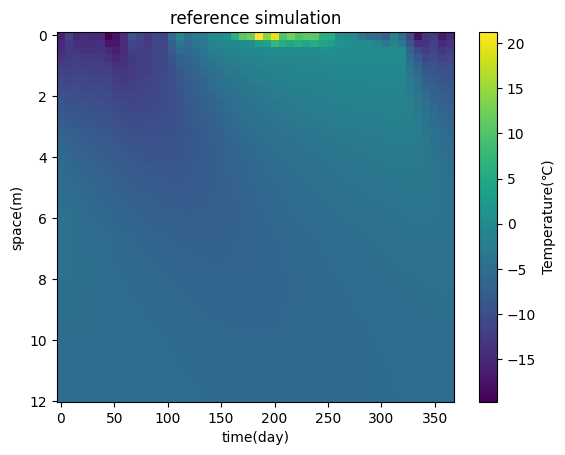

In [48]:
plot_data(model=model1, data=data1, key=90, mode = "reference")

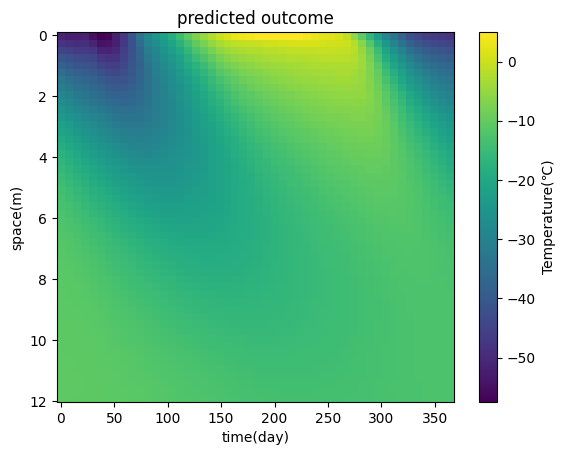

In [49]:
plot_data(model=model1, data=data1, key=90, mode = "predict")

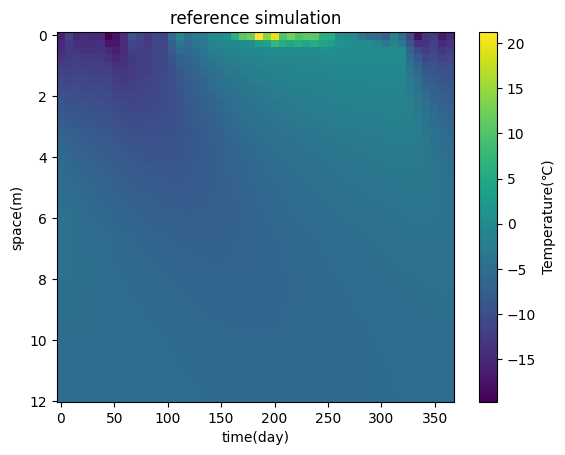

In [50]:
plot_data(model=model2, data=data2, key=90, mode = "reference")

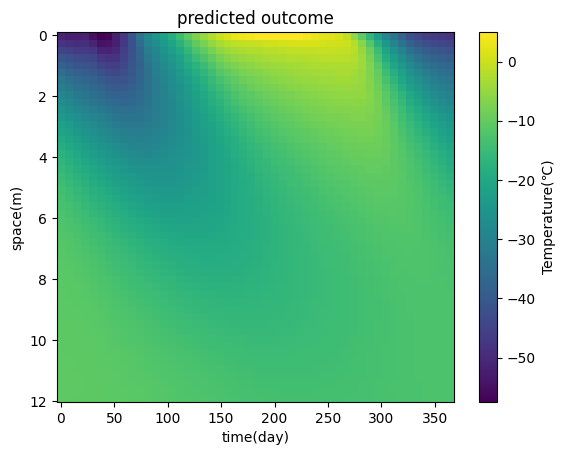

In [51]:
plot_data(model=model2, data=data2, key=90, mode = "predict")

In [52]:
def plot_data(model=None, data=None, key=10, num_coords=54750, num_space = 150, mode = "reference"):
    data_x = data1.test_x
    data_y = data1.test_y
    y_pred = model1.predict(data_x)
    xt = np.zeros((num_coords, 2))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]
        xt[q, 1] = tmp_list[q][1]
    y_predict_arr = y_pred[key].reshape(num_coords, 1)
    y_true_arr = data_y[key].reshape(num_coords, 1)
    np.savetxt("permafrost_3.{}.dat".format(key), np.hstack((xt, y_true_arr, y_predict_arr)))
    data_plot = np.genfromtxt("permafrost_3.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    X = np.linspace(min(x), max(x))
    T = np.linspace(min(t), max(t))
    X, T = np.meshgrid(X, T)
    # plotting the refernce data
    if mode == "reference":
        interp1 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,2])
        Z = interp1(X, T)
        graph1 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph1)
        colorbar.set_label('Temperature(℃)')
        plt.title("reference simulation")
        plt.savefig("permafrost_reference_3.{}.png".format(key))
    # getting the predicted data
    if mode == "predict":
        interp2 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,3])
        Z = interp2(X, T)
        graph2 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph2)
        colorbar.set_label('Temperature(℃)')
        plt.title("predicted outcome")
        plt.savefig("permafrost_predict_3.{}.png".format(key))

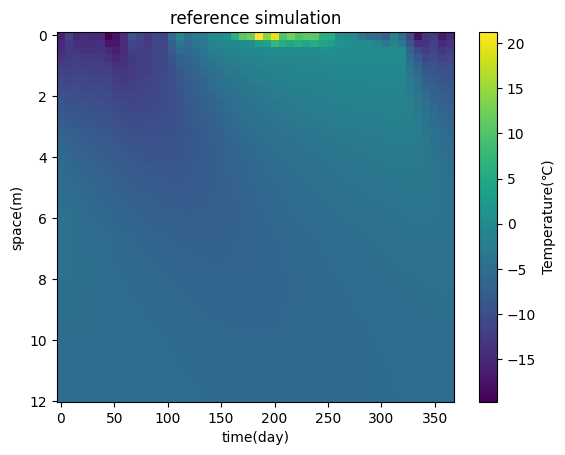

In [53]:
plot_data(model=model1, data=data1, key=90, mode = "reference")

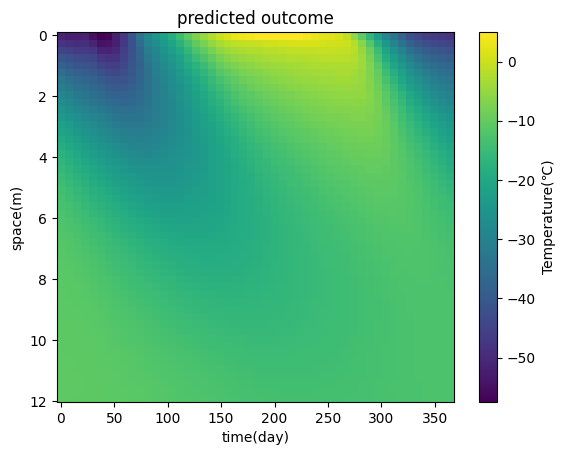

In [54]:
plot_data(model=model1, data=data1, key=90, mode = "predict")

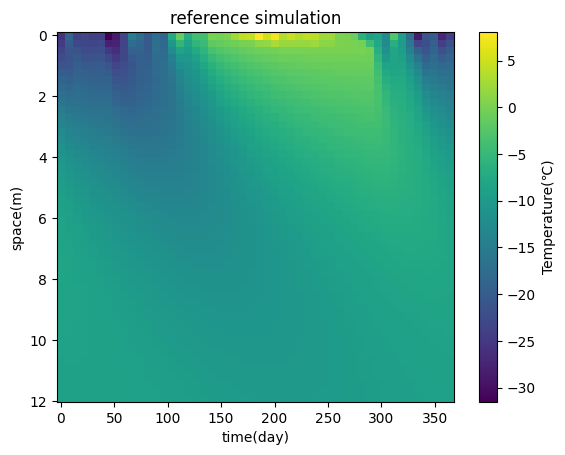

In [55]:
plot_data(model=model1, data=data1, key=70, mode = "reference")

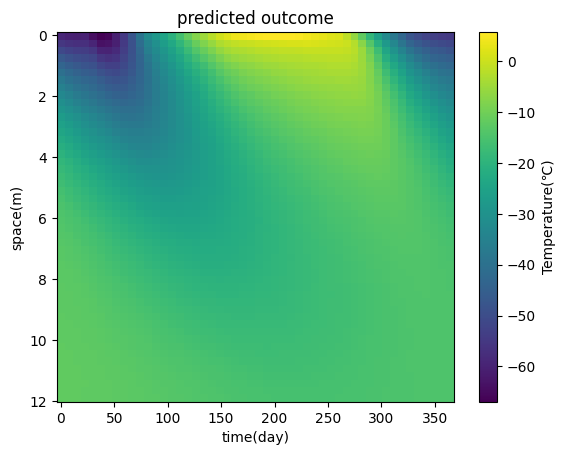

In [56]:
plot_data(model=model1, data=data1, key=70, mode = "predict")

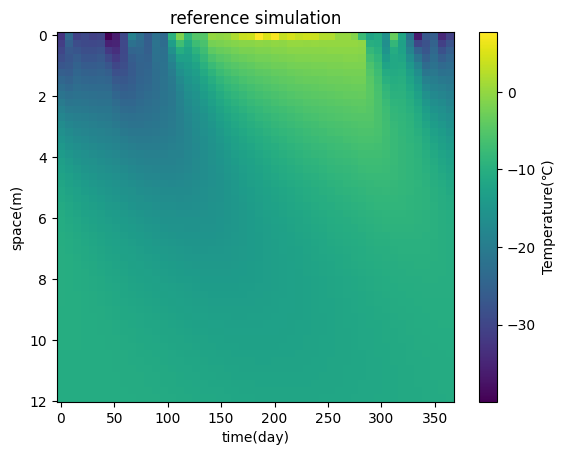

In [57]:
plot_data(model=model1, data=data1, key=30, mode = "reference")

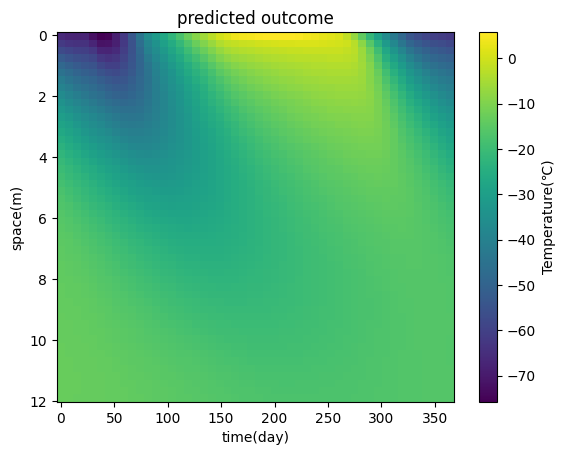

In [58]:
plot_data(model=model1, data=data1, key=30, mode = "predict")

In [59]:
def train_DeepONet(nx=13, num_epochs=50000, func_train_data = generate_train_data, func_test_data = generate_test_data):
    x_train, y_train = func_train_data()
    x_test, y_test = func_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 512], [2, 512, 512, 512, 512], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [60]:
model1, data1 = train_DeepONet(nx=378, num_epochs=30000)

<ipython-input-42-684e6945caaf>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


Compiling model...
'compile' took 0.002565 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [9.23e+02]    [1.06e+03]    [5.74e+00]    
1000      [1.59e+01]    [1.94e+01]    [7.48e-01]    
2000      [2.08e+01]    [2.22e+01]    [9.33e-01]    
3000      [2.43e+00]    [1.82e+01]    [6.08e-01]    
4000      [1.33e+00]    [2.59e+01]    [7.71e-01]    
5000      [9.38e-01]    [4.19e+01]    [9.97e-01]    
6000      [7.11e-01]    [3.73e+01]    [9.44e-01]    
7000      [7.48e-01]    [4.45e+01]    [1.04e+00]    
8000      [7.07e-01]    [4.45e+01]    [1.04e+00]    
9000      [1.05e+00]    [3.08e+01]    [8.15e-01]    
10000     [4.97e-01]    [3.62e+01]    [8.98e-01]    
11000     [1.00e+00]    [4.11e+01]    [9.64e-01]    
12000     [4.50e-01]    [3.23e+01]    [8.32e-01]    
13000     [3.98e-01]    [3.21e+01]    [8.20e-01]    
Epoch 13000: early stopping

Best model at step 13000:
  train loss: 3.98e-01
  test loss: 3.21e+01
  test metric: [8.20e-01]

'train' took 

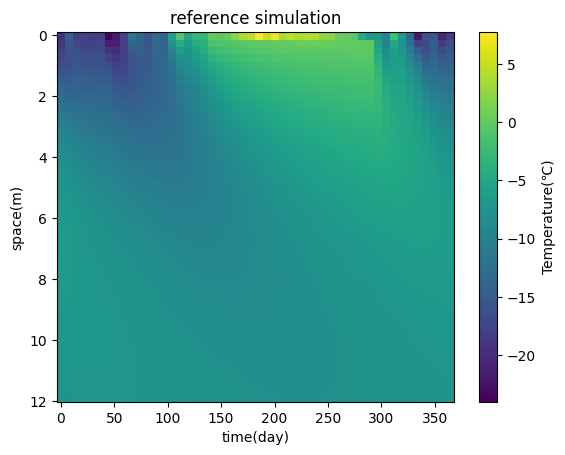

In [61]:
plot_data(model=model1, data=data1, key=10, mode = "reference")

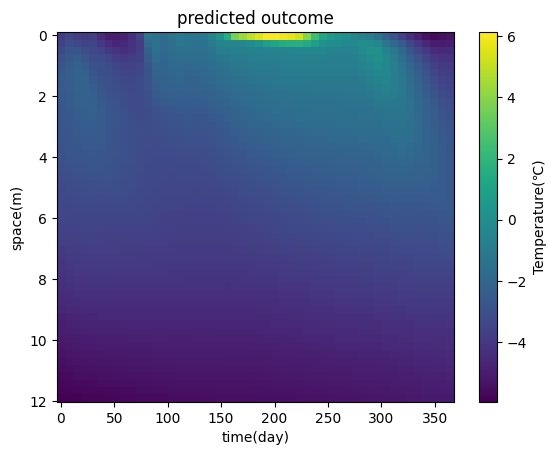

In [62]:
plot_data(model=model1, data=data1, key=10, mode = "predict")

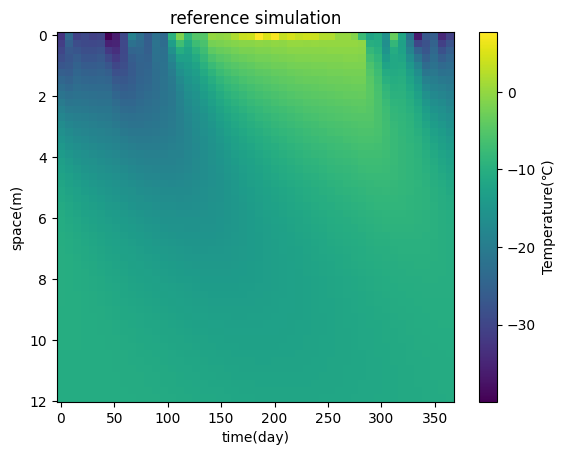

In [63]:
plot_data(model=model1, data=data1, key=30, mode = "reference")

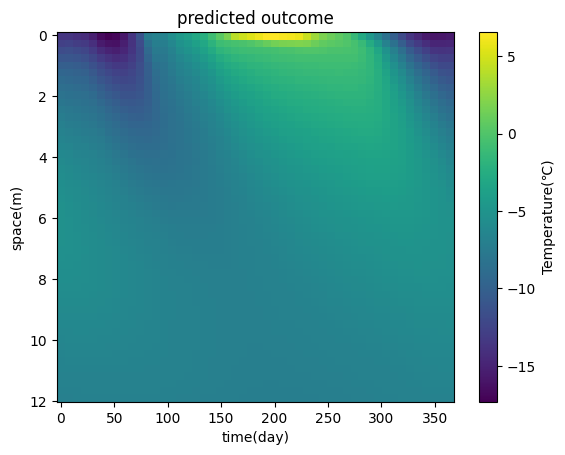

In [64]:
plot_data(model=model1, data=data1, key=30, mode = "predict")

In [65]:
def train_DeepONet(nx=13, num_epochs=50000, func_train_data = generate_train_data, func_test_data = generate_test_data):
    x_train, y_train = func_train_data()
    x_test, y_test = func_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [66]:
model1, data1 = train_DeepONet(nx=378, num_epochs=30000)

<ipython-input-42-684e6945caaf>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


Compiling model...
'compile' took 0.002522 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.93e+03]    [1.99e+03]    [8.07e+00]    
1000      [1.69e+01]    [1.90e+01]    [8.38e-01]    
2000      [1.45e+01]    [1.86e+01]    [6.89e-01]    
3000      [2.80e+00]    [3.43e+00]    [3.26e-01]    
4000      [1.65e+00]    [2.27e+00]    [2.11e-01]    
5000      [9.46e-01]    [2.50e+00]    [3.25e-01]    
6000      [7.18e-01]    [2.57e+00]    [3.42e-01]    
7000      [6.20e-01]    [4.56e+00]    [4.72e-01]    
8000      [7.99e-01]    [6.72e+00]    [5.74e-01]    
9000      [7.51e-01]    [6.85e+00]    [5.84e-01]    
10000     [6.61e-01]    [7.34e+00]    [5.97e-01]    
11000     [4.61e-01]    [6.37e+00]    [5.52e-01]    
12000     [5.38e-01]    [5.65e+00]    [5.28e-01]    
13000     [4.01e-01]    [6.86e+00]    [5.79e-01]    
14000     [3.77e-01]    [6.89e+00]    [5.86e-01]    
Epoch 14000: early stopping

Best model at step 14000:
  train loss: 3.77e-01
  test lo

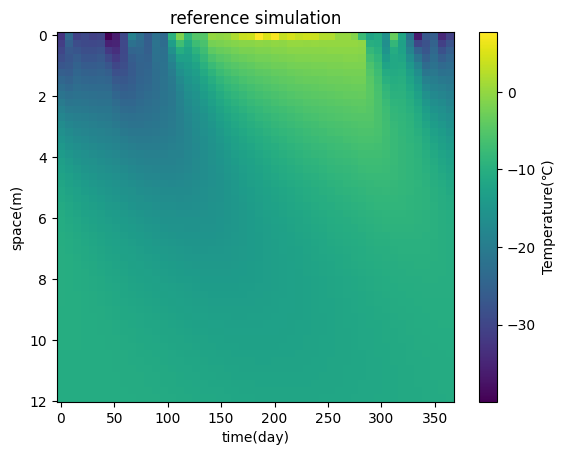

In [67]:
plot_data(model=model1, data=data1, key=30, mode = "reference")

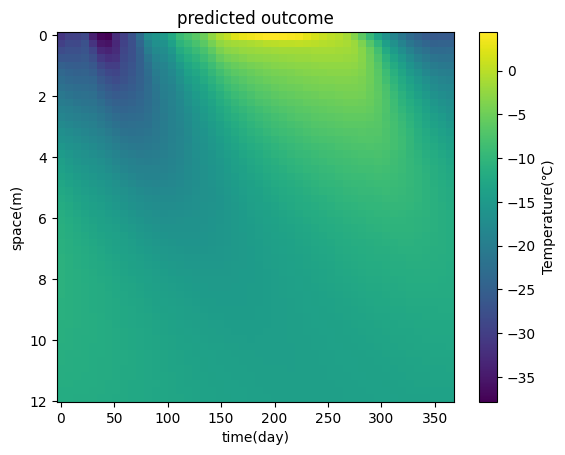

In [68]:
plot_data(model=model1, data=data1, key=30, mode = "predict")

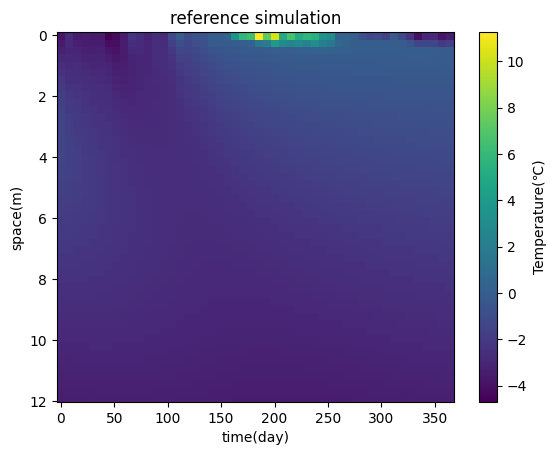

In [69]:
plot_data(model=model1, data=data1, key=50, mode = "reference")

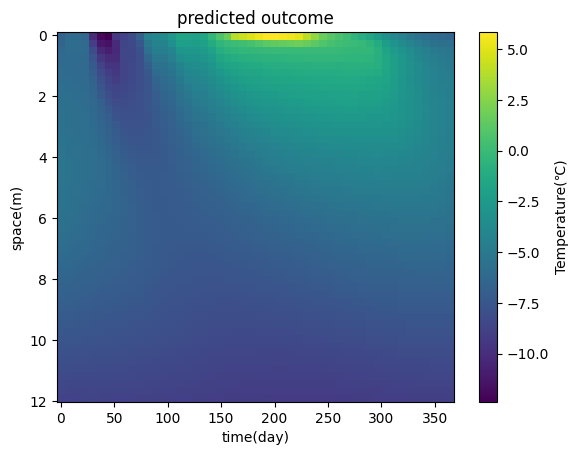

In [70]:
plot_data(model=model1, data=data1, key=50, mode = "predict")

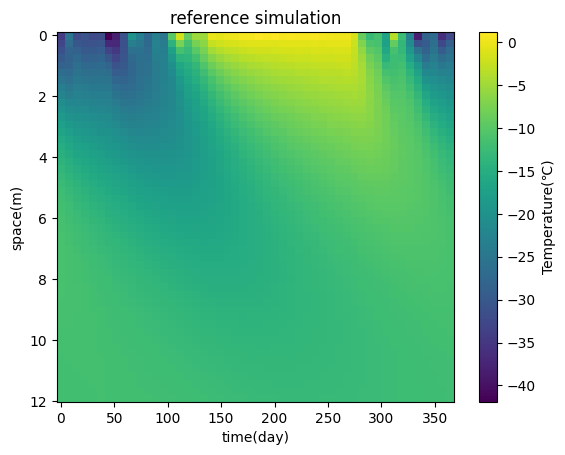

In [71]:
plot_data(model=model1, data=data1, key=55, mode = "reference")

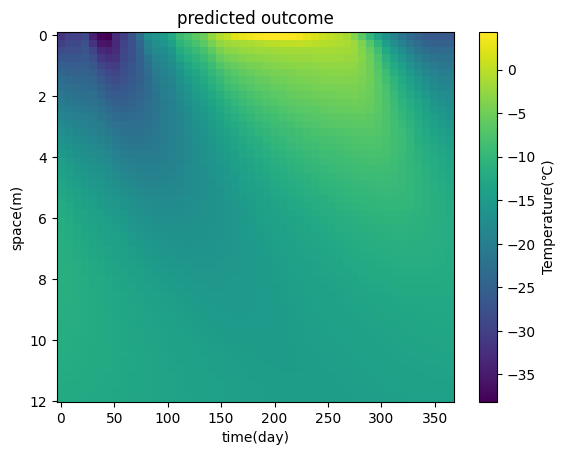

In [72]:
plot_data(model=model1, data=data1, key=55, mode = "predict")

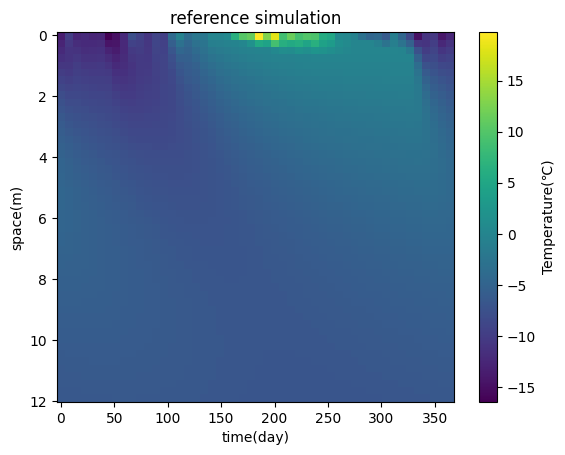

In [73]:
plot_data(model=model1, data=data1, key=75, mode = "reference")

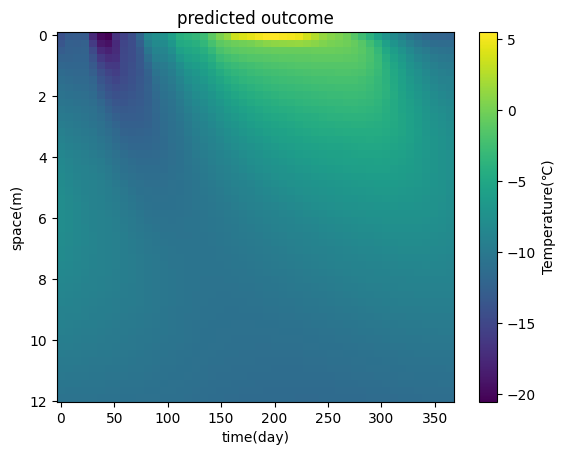

In [74]:
plot_data(model=model1, data=data1, key=75, mode = "predict")

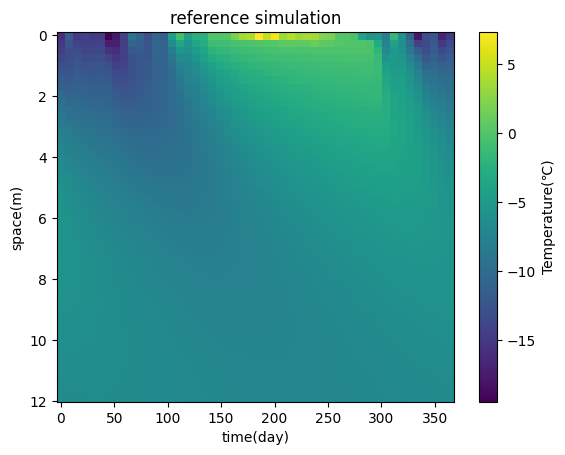

In [75]:
plot_data(model=model1, data=data1, key=85, mode = "reference")

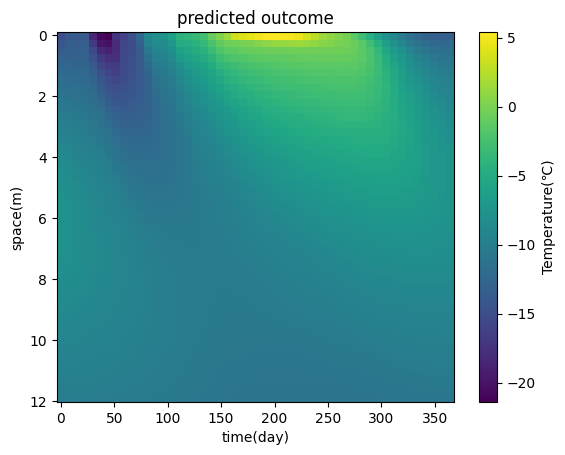

In [76]:
plot_data(model=model1, data=data1, key=85, mode = "predict")

In [77]:
if None

SyntaxError: expected ':' (<ipython-input-77-04a57dcce386>, line 1)

In [78]:
def train_DeepONet(nx=13, num_epochs=50000, func_train_data = generate_train_data, func_test_data = generate_test_data, callbacks = None):
    x_train, y_train = func_train_data()
    x_test, y_test = func_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    if callbacks:
        losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    else:
        losshistory, train_state = model.train(epochs=num_epochs, batch_size=None)
    return model, data 

In [79]:
model1, data1 = train_DeepONet(nx=378, num_epochs=30000)

<ipython-input-42-684e6945caaf>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


Compiling model...
'compile' took 0.002709 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.93e+03]    [1.99e+03]    [8.07e+00]    
1000      [1.69e+01]    [1.90e+01]    [8.38e-01]    
2000      [1.45e+01]    [1.86e+01]    [6.89e-01]    
3000      [2.80e+00]    [3.43e+00]    [3.26e-01]    
4000      [1.65e+00]    [2.27e+00]    [2.11e-01]    
5000      [9.46e-01]    [2.50e+00]    [3.25e-01]    
6000      [7.18e-01]    [2.57e+00]    [3.42e-01]    
7000      [6.20e-01]    [4.56e+00]    [4.72e-01]    
8000      [7.99e-01]    [6.72e+00]    [5.74e-01]    
9000      [7.51e-01]    [6.85e+00]    [5.84e-01]    
10000     [6.61e-01]    [7.34e+00]    [5.97e-01]    
11000     [4.61e-01]    [6.37e+00]    [5.52e-01]    
12000     [5.38e-01]    [5.65e+00]    [5.28e-01]    
13000     [4.01e-01]    [6.86e+00]    [5.79e-01]    
14000     [3.77e-01]    [6.89e+00]    [5.86e-01]    
Epoch 14000: early stopping

Best model at step 14000:
  train loss: 3.77e-01
  test lo

In [80]:
def train_DeepONet(nx=13, num_epochs=50000, func_train_data = generate_train_data, func_test_data = generate_test_data, callbacks = None):
    x_train, y_train = func_train_data()
    x_test, y_test = func_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    if callbacks == None:
        losshistory, train_state = model.train(epochs=num_epochs, batch_size=None)
    else:
        losshistory, train_state = model.train(epochs=num_epochs, batch_size=None, callbacks= callbacks)
    return model, data 

In [81]:
model1, data1 = train_DeepONet(nx=378, num_epochs=30000)

<ipython-input-42-684e6945caaf>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]


Compiling model...
'compile' took 0.002636 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.93e+03]    [1.99e+03]    [8.07e+00]    
1000      [1.69e+01]    [1.90e+01]    [8.38e-01]    
2000      [1.45e+01]    [1.86e+01]    [6.89e-01]    
3000      [2.80e+00]    [3.43e+00]    [3.26e-01]    
4000      [1.65e+00]    [2.27e+00]    [2.11e-01]    
5000      [9.46e-01]    [2.50e+00]    [3.25e-01]    
6000      [7.18e-01]    [2.57e+00]    [3.42e-01]    
7000      [6.20e-01]    [4.56e+00]    [4.72e-01]    
8000      [7.99e-01]    [6.72e+00]    [5.74e-01]    
9000      [7.51e-01]    [6.85e+00]    [5.84e-01]    
10000     [6.61e-01]    [7.34e+00]    [5.97e-01]    
11000     [4.61e-01]    [6.37e+00]    [5.52e-01]    
12000     [5.38e-01]    [5.65e+00]    [5.28e-01]    
13000     [4.01e-01]    [6.86e+00]    [5.79e-01]    
14000     [3.77e-01]    [6.89e+00]    [5.86e-01]    
Epoch 14000: early stopping

Best model at step 14000:
  train loss: 3.77e-01
  test lo

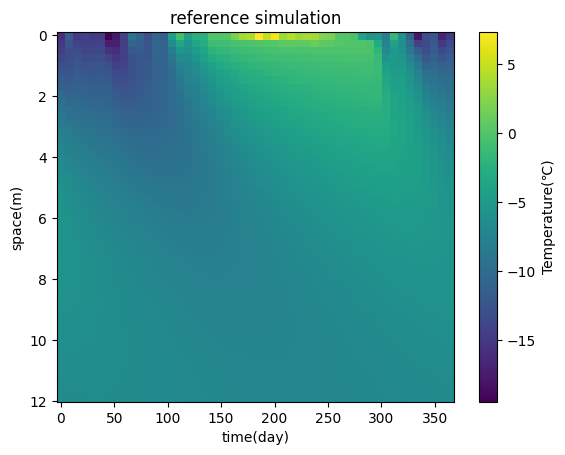

In [82]:
plot_data(model=model1, data=data1, key=85, mode = "reference")

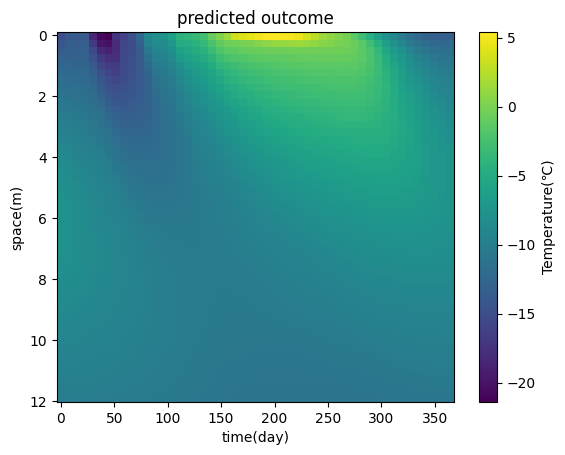

In [83]:
plot_data(model=model1, data=data1, key=85, mode = "predict")

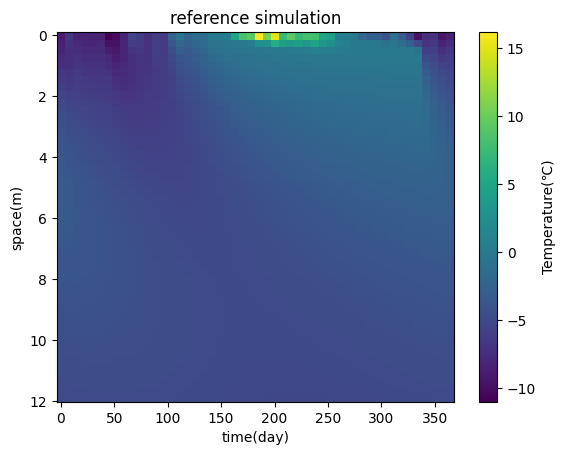

In [84]:
plot_data(model=model1, data=data1, key=95, mode = "reference")

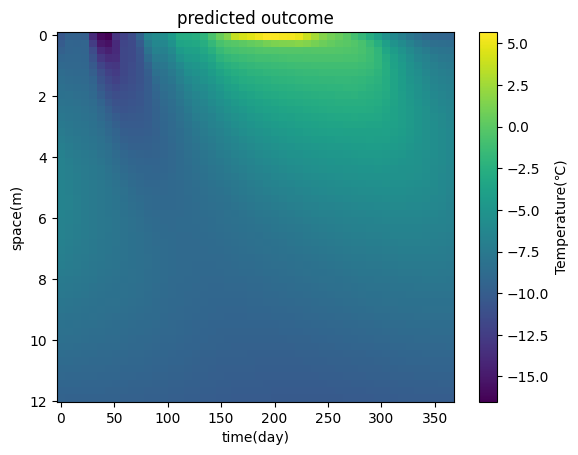

In [85]:
plot_data(model=model1, data=data1, key=95, mode = "predict")

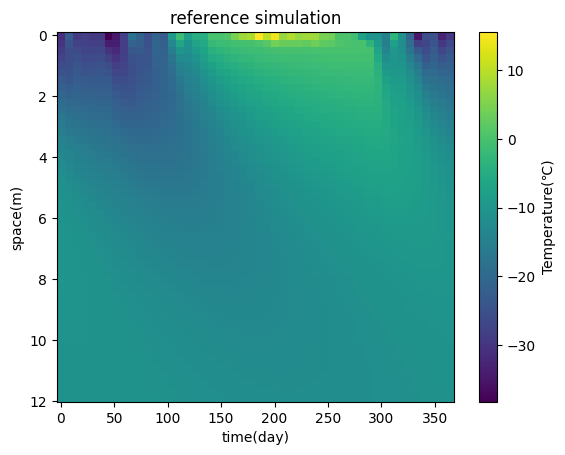

In [86]:
plot_data(model=model1, data=data1, key=65, mode = "reference")

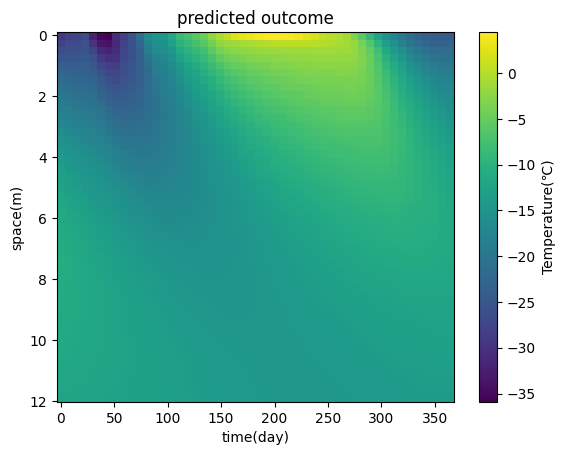

In [87]:
plot_data(model=model1, data=data1, key=65, mode = "predict")

In [1]:
dataset

NameError: name 'dataset' is not defined

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import deepxde as dde
from deepxde.backend import tf
from scipy.interpolate import LinearNDInterpolator
import xarray as xr
import pandas as pd

2023-09-21 12:56:06.398328: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 12:56:51.588979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Enable just-in-time compilation with XLA.



In [3]:
dataset = xr.load_dataset("data/cglite_freeW_ERA_MKL_2010-2020/cglite_freeW_ERA_MKL_2010-2020.nc")
input_data = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/input_data.csv")
parameters = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/parameters.csv")

In [4]:
time_coords = dataset["T"].coords["time"].values

In [5]:
time_coords

array(['2010-09-01T00:00:00.000000000', '2010-09-02T00:00:00.000000000',
       '2010-09-03T00:00:00.000000000', ...,
       '2020-12-28T00:00:00.000000000', '2020-12-29T00:00:00.000000000',
       '2020-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
time_coords[122:487]

array(['2011-01-01T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-01-03T00:00:00.000000000', '2011-01-04T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-01-06T00:00:00.000000000',
       '2011-01-07T00:00:00.000000000', '2011-01-08T00:00:00.000000000',
       '2011-01-09T00:00:00.000000000', '2011-01-10T00:00:00.000000000',
       '2011-01-11T00:00:00.000000000', '2011-01-12T00:00:00.000000000',
       '2011-01-13T00:00:00.000000000', '2011-01-14T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-16T00:00:00.000000000',
       '2011-01-17T00:00:00.000000000', '2011-01-18T00:00:00.000000000',
       '2011-01-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-01-21T00:00:00.000000000', '2011-01-22T00:00:00.000000000',
       '2011-01-23T00:00:00.000000000', '2011-01-24T00:00:00.000000000',
       '2011-01-25T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-01-27T00:00:00.000000000', '2011-01-28

In [9]:
type(time_coords)

numpy.ndarray

In [10]:
key=10

In [11]:
data_plot = np.genfromtxt("permafrost_3.{}.dat".format(key), delimiter=' ')

In [12]:
t = data_plot[:,0]

In [13]:
t

array([  0.,   0.,   0., ..., 364., 364., 364.])

In [14]:
t.shape

(54750,)

In [15]:
x = data_plot[:,1]

In [16]:
x

array([ 0.025,  0.075,  0.125, ..., 11.5  , 11.7  , 11.9  ])

In [17]:
x.shape

(54750,)

In [18]:
time_coords = np.array([n for n in range(365)])

In [19]:
iter_arr = [n for n in range(150)]

In [20]:
iter_arr

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

In [21]:
space_coords = dataset["T"].coords["z"].values[0:150]

In [22]:
space_coords.shape

(150,)

In [23]:
space_list = list(dataset["T"].coords["z"].values[0:150])

In [24]:
space_list

[0.025,
 0.075,
 0.125,
 0.175,
 0.225,
 0.275,
 0.325,
 0.375,
 0.425,
 0.475,
 0.525,
 0.575,
 0.625,
 0.675,
 0.725,
 0.775,
 0.825,
 0.875,
 0.925,
 0.975,
 1.025,
 1.075,
 1.125,
 1.175,
 1.225,
 1.275,
 1.325,
 1.375,
 1.425,
 1.475,
 1.525,
 1.575,
 1.625,
 1.675,
 1.725,
 1.775,
 1.825,
 1.875,
 1.925,
 1.975,
 2.025,
 2.075,
 2.125,
 2.175,
 2.225,
 2.275,
 2.325,
 2.375,
 2.425,
 2.475,
 2.525,
 2.575,
 2.625,
 2.675,
 2.725,
 2.775,
 2.825,
 2.875,
 2.925,
 2.975,
 3.025,
 3.075,
 3.125,
 3.175,
 3.225,
 3.275,
 3.325,
 3.375,
 3.425,
 3.475,
 3.525,
 3.575,
 3.625,
 3.675,
 3.725,
 3.775,
 3.825,
 3.875,
 3.925,
 3.975,
 4.05,
 4.15,
 4.25,
 4.35,
 4.45,
 4.55,
 4.65,
 4.75,
 4.85,
 4.95,
 5.05,
 5.15,
 5.25,
 5.35,
 5.45,
 5.55,
 5.65,
 5.75,
 5.85,
 5.95,
 6.05,
 6.15,
 6.25,
 6.35,
 6.45,
 6.55,
 6.65,
 6.75,
 6.85,
 6.95,
 7.05,
 7.15,
 7.25,
 7.35,
 7.45,
 7.55,
 7.65,
 7.75,
 7.85,
 7.95,
 8.05,
 8.15,
 8.25,
 8.35,
 8.45,
 8.55,
 8.65,
 8.75,
 8.85,
 8.95,
 9.05,
 9.

In [25]:
iter_list = [n for n in range(150)]
dict_list = zip(space_list, iter_list)

In [26]:
dict_list

In [27]:
dict_list = list(zip(space_list, iter_list))

In [28]:
dict_list

[(0.025, 0),
 (0.075, 1),
 (0.125, 2),
 (0.175, 3),
 (0.225, 4),
 (0.275, 5),
 (0.325, 6),
 (0.375, 7),
 (0.425, 8),
 (0.475, 9),
 (0.525, 10),
 (0.575, 11),
 (0.625, 12),
 (0.675, 13),
 (0.725, 14),
 (0.775, 15),
 (0.825, 16),
 (0.875, 17),
 (0.925, 18),
 (0.975, 19),
 (1.025, 20),
 (1.075, 21),
 (1.125, 22),
 (1.175, 23),
 (1.225, 24),
 (1.275, 25),
 (1.325, 26),
 (1.375, 27),
 (1.425, 28),
 (1.475, 29),
 (1.525, 30),
 (1.575, 31),
 (1.625, 32),
 (1.675, 33),
 (1.725, 34),
 (1.775, 35),
 (1.825, 36),
 (1.875, 37),
 (1.925, 38),
 (1.975, 39),
 (2.025, 40),
 (2.075, 41),
 (2.125, 42),
 (2.175, 43),
 (2.225, 44),
 (2.275, 45),
 (2.325, 46),
 (2.375, 47),
 (2.425, 48),
 (2.475, 49),
 (2.525, 50),
 (2.575, 51),
 (2.625, 52),
 (2.675, 53),
 (2.725, 54),
 (2.775, 55),
 (2.825, 56),
 (2.875, 57),
 (2.925, 58),
 (2.975, 59),
 (3.025, 60),
 (3.075, 61),
 (3.125, 62),
 (3.175, 63),
 (3.225, 64),
 (3.275, 65),
 (3.325, 66),
 (3.375, 67),
 (3.425, 68),
 (3.475, 69),
 (3.525, 70),
 (3.575, 71),
 (

In [29]:
dict_space = dict(dict_list)

In [30]:
dict_space

{0.025: 0,
 0.075: 1,
 0.125: 2,
 0.175: 3,
 0.225: 4,
 0.275: 5,
 0.325: 6,
 0.375: 7,
 0.425: 8,
 0.475: 9,
 0.525: 10,
 0.575: 11,
 0.625: 12,
 0.675: 13,
 0.725: 14,
 0.775: 15,
 0.825: 16,
 0.875: 17,
 0.925: 18,
 0.975: 19,
 1.025: 20,
 1.075: 21,
 1.125: 22,
 1.175: 23,
 1.225: 24,
 1.275: 25,
 1.325: 26,
 1.375: 27,
 1.425: 28,
 1.475: 29,
 1.525: 30,
 1.575: 31,
 1.625: 32,
 1.675: 33,
 1.725: 34,
 1.775: 35,
 1.825: 36,
 1.875: 37,
 1.925: 38,
 1.975: 39,
 2.025: 40,
 2.075: 41,
 2.125: 42,
 2.175: 43,
 2.225: 44,
 2.275: 45,
 2.325: 46,
 2.375: 47,
 2.425: 48,
 2.475: 49,
 2.525: 50,
 2.575: 51,
 2.625: 52,
 2.675: 53,
 2.725: 54,
 2.775: 55,
 2.825: 56,
 2.875: 57,
 2.925: 58,
 2.975: 59,
 3.025: 60,
 3.075: 61,
 3.125: 62,
 3.175: 63,
 3.225: 64,
 3.275: 65,
 3.325: 66,
 3.375: 67,
 3.425: 68,
 3.475: 69,
 3.525: 70,
 3.575: 71,
 3.625: 72,
 3.675: 73,
 3.725: 74,
 3.775: 75,
 3.825: 76,
 3.875: 77,
 3.925: 78,
 3.975: 79,
 4.05: 80,
 4.15: 81,
 4.25: 82,
 4.35: 83,
 4.45:

In [31]:
dict_space[11.9]

149

In [32]:
x

array([ 0.025,  0.075,  0.125, ..., 11.5  , 11.7  , 11.9  ])

In [33]:
x = data_plot[:,1]

In [34]:
t = data_plot[:,0]

In [35]:
x

array([ 0.025,  0.075,  0.125, ..., 11.5  , 11.7  , 11.9  ])

In [36]:
t

array([  0.,   0.,   0., ..., 364., 364., 364.])

In [37]:
dict_space[0.075]

1

In [38]:
x[151]

0.075

In [39]:
x[364*150+1]

0.075

In [40]:
pwd

'/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace'

In [41]:
def plot_data_fixed_depth(key=10, depth=0.075, num_coords=54750, num_space = 15):
    a = int((key+1) % 10)
    b = int((key + 1 - a)/10)
    index_a = a - 1
    index_b = b - 1
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    space_list = list(space_coords)
    iter_list = [n for n in range(150)]
    dict_list = list(zip(space_list, iter_list))
    dict_space = dict(dict_list)
    key_space = dict_space[depth]
    data_plot = np.genfromtxt("permafrost_3.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    time = dataset["T"].coords["time"].values[(122+index_a*366):(487+index_a*366)]
    tem_ref = data_plot[:,2]
    tem_pre = data_plot[:,3]
    list_tem_ref = []
    list_tem_pre = []
    for n in range(365):
        list_tem_ref.append(tem_ref[n*150+key_space])
        list_tem_pre.append(tem_pre[n*150+key_space])
    plt.figure(figsize=(8,6))
    plt.plot(time, list_tem_ref, label='reference', linestyle='-', color='blue')
    plt.plot(time, list_tem_pre, label='predicted', linestyle='-', color='red')
    plt.xlabel('Time')
    plt.ylabel('Temperature(℃)')
    plt.legend()
    plt.savefig("temperature_depth{}_{}.png".format(depth, key))

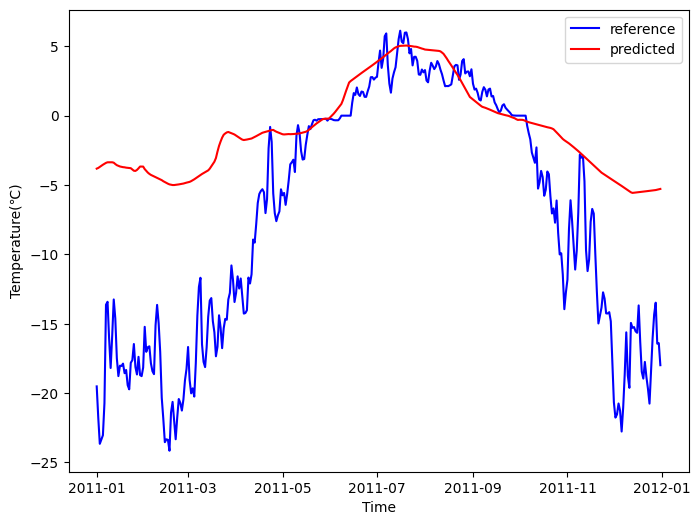

In [42]:
plot_data_fixed_depth()

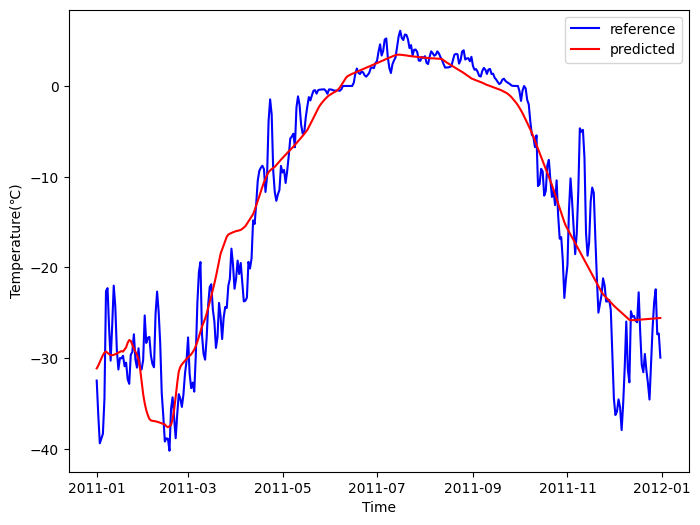

In [43]:
plot_data_fixed_depth(key=30)

In [44]:
x[0:10]

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475])

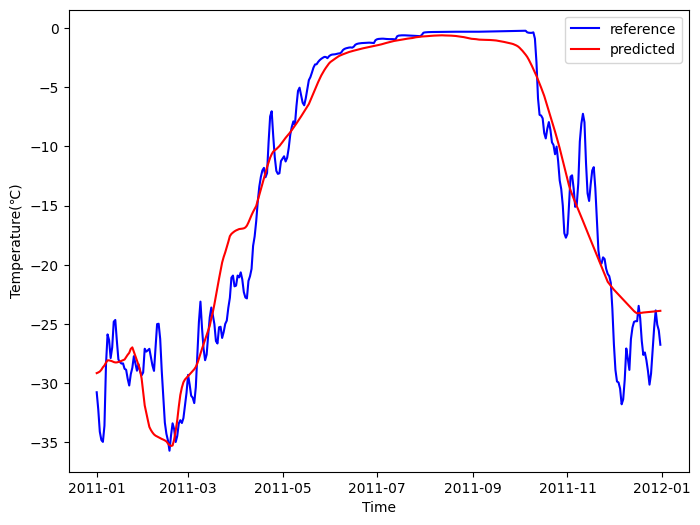

In [45]:
plot_data_fixed_depth(key=30, depth=0.375)

In [46]:
plot_data_fixed_depth(key=30, depth=11.5)

KeyError: 11.5

In [47]:
plot_data_fixed_depth(key=30, depth=11.50)

KeyError: 11.5

In [48]:
plot_data_fixed_depth(key=30, depth=11.500)

KeyError: 11.5

In [49]:
type(x[-1])

numpy.float64

In [50]:
type(x)

numpy.ndarray

In [51]:
dict_space

{0.025: 0,
 0.075: 1,
 0.125: 2,
 0.175: 3,
 0.225: 4,
 0.275: 5,
 0.325: 6,
 0.375: 7,
 0.425: 8,
 0.475: 9,
 0.525: 10,
 0.575: 11,
 0.625: 12,
 0.675: 13,
 0.725: 14,
 0.775: 15,
 0.825: 16,
 0.875: 17,
 0.925: 18,
 0.975: 19,
 1.025: 20,
 1.075: 21,
 1.125: 22,
 1.175: 23,
 1.225: 24,
 1.275: 25,
 1.325: 26,
 1.375: 27,
 1.425: 28,
 1.475: 29,
 1.525: 30,
 1.575: 31,
 1.625: 32,
 1.675: 33,
 1.725: 34,
 1.775: 35,
 1.825: 36,
 1.875: 37,
 1.925: 38,
 1.975: 39,
 2.025: 40,
 2.075: 41,
 2.125: 42,
 2.175: 43,
 2.225: 44,
 2.275: 45,
 2.325: 46,
 2.375: 47,
 2.425: 48,
 2.475: 49,
 2.525: 50,
 2.575: 51,
 2.625: 52,
 2.675: 53,
 2.725: 54,
 2.775: 55,
 2.825: 56,
 2.875: 57,
 2.925: 58,
 2.975: 59,
 3.025: 60,
 3.075: 61,
 3.125: 62,
 3.175: 63,
 3.225: 64,
 3.275: 65,
 3.325: 66,
 3.375: 67,
 3.425: 68,
 3.475: 69,
 3.525: 70,
 3.575: 71,
 3.625: 72,
 3.675: 73,
 3.725: 74,
 3.775: 75,
 3.825: 76,
 3.875: 77,
 3.925: 78,
 3.975: 79,
 4.05: 80,
 4.15: 81,
 4.25: 82,
 4.35: 83,
 4.45:

In [52]:
type(dict_space)

dict

In [53]:
dict_space.keys()

dict_keys([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975, 1.025, 1.075, 1.125, 1.175, 1.225, 1.275, 1.325, 1.375, 1.425, 1.475, 1.525, 1.575, 1.625, 1.675, 1.725, 1.775, 1.825, 1.875, 1.925, 1.975, 2.025, 2.075, 2.125, 2.175, 2.225, 2.275, 2.325, 2.375, 2.425, 2.475, 2.525, 2.575, 2.625, 2.675, 2.725, 2.775, 2.825, 2.875, 2.925, 2.975, 3.025, 3.075, 3.125, 3.175, 3.225, 3.275, 3.325, 3.375, 3.425, 3.475, 3.525, 3.575, 3.625, 3.675, 3.725, 3.775, 3.825, 3.875, 3.925, 3.975, 4.05, 4.15, 4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.15, 6.25, 6.35, 6.45, 6.55, 6.65, 6.75, 6.85, 6.95, 7.05, 7.15, 7.25, 7.35, 7.45, 7.55, 7.65, 7.75, 7.85, 7.95, 8.05, 8.15, 8.25, 8.35, 8.45, 8.55, 8.65, 8.75, 8.85, 8.95, 9.05, 9.15, 9.25, 9.35, 9.45, 9.55, 9.65, 9.75, 9.85, 9.95, 10.1, 10.3, 10.5, 10.7, 10.9, 11.1, 11.3, 11.5, 11.7, 11.9])

In [54]:
dict_space.keys()[-1]

TypeError: 'dict_keys' object is not subscriptable

In [55]:
list(dict_space.keys())[-1]

11.9

In [56]:
type(list(dict_space.keys())[-1])

numpy.float64

In [57]:
dict_space[11.5]

147

In [58]:
dict_space

{0.025: 0,
 0.075: 1,
 0.125: 2,
 0.175: 3,
 0.225: 4,
 0.275: 5,
 0.325: 6,
 0.375: 7,
 0.425: 8,
 0.475: 9,
 0.525: 10,
 0.575: 11,
 0.625: 12,
 0.675: 13,
 0.725: 14,
 0.775: 15,
 0.825: 16,
 0.875: 17,
 0.925: 18,
 0.975: 19,
 1.025: 20,
 1.075: 21,
 1.125: 22,
 1.175: 23,
 1.225: 24,
 1.275: 25,
 1.325: 26,
 1.375: 27,
 1.425: 28,
 1.475: 29,
 1.525: 30,
 1.575: 31,
 1.625: 32,
 1.675: 33,
 1.725: 34,
 1.775: 35,
 1.825: 36,
 1.875: 37,
 1.925: 38,
 1.975: 39,
 2.025: 40,
 2.075: 41,
 2.125: 42,
 2.175: 43,
 2.225: 44,
 2.275: 45,
 2.325: 46,
 2.375: 47,
 2.425: 48,
 2.475: 49,
 2.525: 50,
 2.575: 51,
 2.625: 52,
 2.675: 53,
 2.725: 54,
 2.775: 55,
 2.825: 56,
 2.875: 57,
 2.925: 58,
 2.975: 59,
 3.025: 60,
 3.075: 61,
 3.125: 62,
 3.175: 63,
 3.225: 64,
 3.275: 65,
 3.325: 66,
 3.375: 67,
 3.425: 68,
 3.475: 69,
 3.525: 70,
 3.575: 71,
 3.625: 72,
 3.675: 73,
 3.725: 74,
 3.775: 75,
 3.825: 76,
 3.875: 77,
 3.925: 78,
 3.975: 79,
 4.05: 80,
 4.15: 81,
 4.25: 82,
 4.35: 83,
 4.45:

In [59]:
np.round([1.000001])

array([1.])

In [60]:
help(np.round)

Help on _ArrayFunctionDispatcher in module numpy:

round(a, decimals=0, out=None)
    Evenly round to the given number of decimals.
    
    Parameters
    ----------
    a : array_like
        Input data.
    decimals : int, optional
        Number of decimal places to round to (default: 0).  If
        decimals is negative, it specifies the number of positions to
        the left of the decimal point.
    out : ndarray, optional
        Alternative output array in which to place the result. It must have
        the same shape as the expected output, but the type of the output
        values will be cast if necessary. See :ref:`ufuncs-output-type` for more
        details.
    
    Returns
    -------
    rounded_array : ndarray
        An array of the same type as `a`, containing the rounded values.
        Unless `out` was specified, a new array is created.  A reference to
        the result is returned.
    
        The real and imaginary parts of complex numbers are rounded
      

In [61]:
np.round([1.000001], decimals=2)

array([1.])

In [62]:
np.round([1.10000001], decimals=2)

array([1.1])

In [63]:
space_list = list(np.round(space_coords))

In [64]:
list_1 = [1, 2, 3]

In [65]:
str_1 = str(list_1)

In [66]:
str_1

'[1, 2, 3]'

In [67]:
def plot_data_fixed_depth(key=10, depth=0.075, num_coords=54750, num_space = 15):
    a = int((key+1) % 10)
    b = int((key + 1 - a)/10)
    index_a = a - 1
    index_b = b - 1
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    space_list = list(np.round(space_coords))
    space_str = [str(a) for a in space_list]
    iter_list = [n for n in range(150)]
    dict_list = list(zip(space_str, iter_list))
    dict_space = dict(dict_list)
    key_space = dict_space['{}'.format(depth)]
    data_plot = np.genfromtxt("permafrost_3.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    time = dataset["T"].coords["time"].values[(122+index_a*366):(487+index_a*366)]
    tem_ref = data_plot[:,2]
    tem_pre = data_plot[:,3]
    list_tem_ref = []
    list_tem_pre = []
    for n in range(365):
        list_tem_ref.append(tem_ref[n*150+key_space])
        list_tem_pre.append(tem_pre[n*150+key_space])
    plt.figure(figsize=(8,6))
    plt.plot(time, list_tem_ref, label='reference', linestyle='-', color='blue')
    plt.plot(time, list_tem_pre, label='predicted', linestyle='-', color='red')
    plt.xlabel('Time')
    plt.ylabel('Temperature(℃)')
    plt.legend()
    plt.savefig("temperature_depth{}_{}.png".format(depth, key))

In [68]:
plot_data_fixed_depth(key=30, depth=11.5)

KeyError: '11.5'

In [69]:
space_list = list(np.round(space_coords))
space_str = [str(a) for a in space_list]
iter_list = [n for n in range(150)]
dict_list = list(zip(space_str, iter_list))
dict_space = dict(dict_list)

In [70]:
dict_space

{'0.0': 9,
 '1.0': 29,
 '2.0': 49,
 '3.0': 69,
 '4.0': 84,
 '5.0': 94,
 '6.0': 104,
 '7.0': 114,
 '8.0': 124,
 '9.0': 134,
 '10.0': 142,
 '11.0': 146,
 '12.0': 149}

In [71]:
space_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 12.0,
 12.0]

In [72]:
space_coords = dataset["T"].coords["z"].values[0:150]

In [73]:
space_list = list(np.round(space_coords, decimals=2))
space_str = [str(a) for a in space_list]
iter_list = [n for n in range(150)]
dict_list = list(zip(space_str, iter_list))
dict_space = dict(dict_list)

In [74]:
key_space = dict_space['{}'.format(11.7)]

In [75]:
key_space

148

In [76]:
def plot_data_fixed_depth(key=10, depth=0.075, num_coords=54750, num_space = 150):
    a = int((key+1) % 10)
    b = int((key + 1 - a)/10)
    index_a = a - 1
    index_b = b - 1
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    space_list = list(np.round(space_coords, decimals=2))
    space_str = [str(a) for a in space_list]
    iter_list = [n for n in range(150)]
    dict_list = list(zip(space_str, iter_list))
    dict_space = dict(dict_list)
    key_space = dict_space['{}'.format(depth)]
    data_plot = np.genfromtxt("permafrost_3.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    time = dataset["T"].coords["time"].values[(122+index_a*366):(487+index_a*366)]
    tem_ref = data_plot[:,2]
    tem_pre = data_plot[:,3]
    list_tem_ref = []
    list_tem_pre = []
    for n in range(365):
        list_tem_ref.append(tem_ref[n*150+key_space])
        list_tem_pre.append(tem_pre[n*150+key_space])
    plt.figure(figsize=(8,6))
    plt.plot(time, list_tem_ref, label='reference', linestyle='-', color='blue')
    plt.plot(time, list_tem_pre, label='predicted', linestyle='-', color='red')
    plt.xlabel('Time')
    plt.ylabel('Temperature(℃)')
    plt.legend()
    plt.savefig("temperature_depth{}_{}.png".format(depth, key))

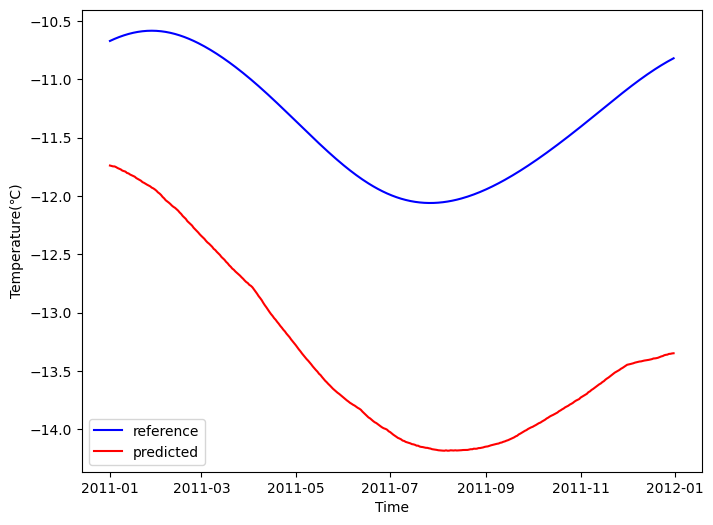

In [77]:
plot_data_fixed_depth(key=30, depth=11.5)

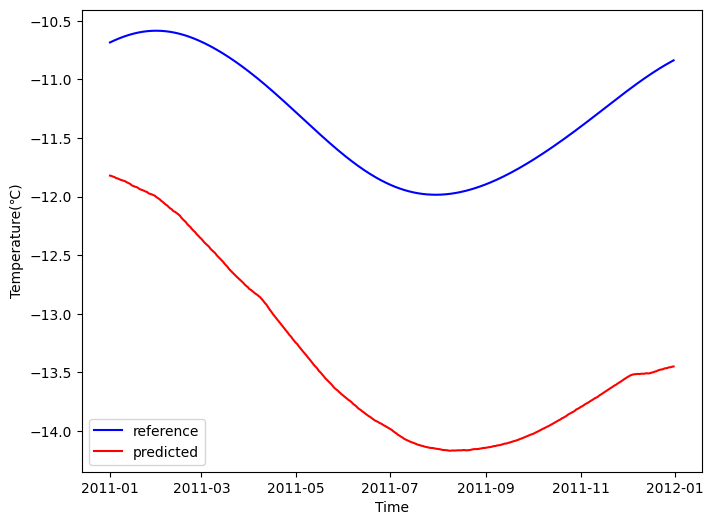

In [78]:
plot_data_fixed_depth(key=30, depth=11.7)

In [79]:
def generate_train_data(num_run = 100, num_time=9, num_space=150, num_params = 13, num_input=365, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,(122+y*366):(487+y*366),0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[(122+y*366):(487+y*366):int(time_span/num_input)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [80]:
def generate_test_data(num_run = 100, num_time=1, num_space=150, num_params = 13, num_input=365, time_span=365, space_span=11.9):
    num_coords = time_span*num_space
    num = num_run*num_time
    data_T = dataset["T"].values
    num_u0 = num_params + num_input
    xt = np.zeros((num_coords, 2))
    u = np.zeros((num, num_coords))
    u0 = np.zeros((num, num_u0))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    input_data_arr = np.array(input_data["Tair"])
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]/time_span
        xt[q, 1] = tmp_list[q][1]/space_span
    for n in range(num_run):
        arr_params = np.array(parameters.iloc[n])
        for y in range(num_time):
            data_T_slice = data_T[n,3408:3773,0:num_space].reshape(num_coords, 1)
            arr_input = input_data_arr[3408:3773:int(time_span/num_input)]
            for p in range(num_coords):
                u[n*num_time + y, p] = data_T_slice[p]
            for a in range(num_params):
                u0[n*num_time + y, a] = arr_params[a]
            for b in range(num_input):
                u0[n*num_time + y, num_params+b] = arr_input[b]
    u0 = np.float32(u0)
    xt = np.float32(xt)
    u = np.float32(u)
    return (u0, xt), u

In [81]:
def train_DeepONet(nx=13, num_epochs=50000, func_train_data = generate_train_data, func_test_data = generate_test_data):
    x_train, y_train = func_train_data()
    x_test, y_test = func_test_data()
    data = dde.data.TripleCartesianProd(x_train, y_train, x_test, y_test)
    net = dde.maps.DeepONetCartesianProd(
        [nx, 512, 512, 1024], [2, 512, 512, 512, 1024], "relu", "Glorot normal"
    )
    model = dde.Model(data, net)
    model.compile(
        "adam",
        lr=1e-3,
        decay=("inverse time", 1, 1e-4),
        metrics=["mean l2 relative error"],
    )
    # callbacks = [dde.callbacks.EarlyStopping(monitor='loss_test', patience=10000)]
    # dde.callbacks.ModelCheckpoint(filepath='best_model', save_better_only=True, period=1000, monitor='test loss')
    losshistory, train_state = model.train(epochs=num_epochs, batch_size=None)
    return model, data 

In [82]:
model1, data1 = train_DeepONet(nx=378, num_epochs=30000)

<ipython-input-79-684e6945caaf>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[n*num_time + y, p] = data_T_slice[p]
2023-09-21 14:27:30.725107: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-09-21 14:27:30.725180: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11877 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-09-21 14:27:30.737985: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-09-2

Compiling model...
'compile' took 0.694109 s

Training model...



/home/guest/lizhen001/anaconda3/envs/cryopinn/lib/python3.11/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
2023-09-21 14:27:33.289807: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55aff1f60730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-21 14:27:33.289848: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2023-09-21 14:27:33.289853: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (1): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2023-09-21 14:27:33.289857: I tensorflow/compiler/xla/service/service.cc:177

Step      Train loss    Test loss     Test metric   
0         [1.67e+03]    [1.78e+03]    [7.60e+00]    
1000      [1.42e+01]    [2.19e+01]    [6.23e-01]    
2000      [1.65e+01]    [1.86e+01]    [8.00e-01]    
3000      [2.90e+00]    [7.49e+01]    [1.39e+00]    
4000      [2.05e+00]    [1.19e+02]    [1.86e+00]    
5000      [7.78e-01]    [9.63e+01]    [1.70e+00]    
6000      [8.03e-01]    [9.82e+01]    [1.71e+00]    
7000      [1.05e+00]    [6.73e+01]    [1.38e+00]    
8000      [5.38e-01]    [7.54e+01]    [1.47e+00]    
9000      [4.74e-01]    [7.92e+01]    [1.51e+00]    
10000     [6.38e-01]    [6.38e+01]    [1.34e+00]    
11000     [6.20e-01]    [6.88e+01]    [1.38e+00]    
12000     [4.74e-01]    [6.23e+01]    [1.30e+00]    
13000     [5.14e-01]    [5.06e+01]    [1.16e+00]    
14000     [4.71e-01]    [5.31e+01]    [1.17e+00]    
15000     [3.58e-01]    [4.37e+01]    [1.04e+00]    
16000     [3.02e-01]    [4.43e+01]    [1.05e+00]    
17000     [6.44e-01]    [4.76e+01]    [1.09e+0

In [83]:
def plot_data_heatmap(model=None, data=None, key=10, num_coords=54750, num_space = 150, mode = "reference"):
    data_x = data1.test_x
    data_y = data1.test_y
    y_pred = model1.predict(data_x)
    xt = np.zeros((num_coords, 2))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]
        xt[q, 1] = tmp_list[q][1]
    y_predict_arr = y_pred[key].reshape(num_coords, 1)
    y_true_arr = data_y[key].reshape(num_coords, 1)
    np.savetxt("permafrost_3.{}.dat".format(key), np.hstack((xt, y_true_arr, y_predict_arr)))
    data_plot = np.genfromtxt("permafrost_4.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    X = np.linspace(min(x), max(x))
    T = np.linspace(min(t), max(t))
    X, T = np.meshgrid(X, T)
    # plotting the refernce data
    if mode == "reference":
        interp1 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,2])
        Z = interp1(X, T)
        graph1 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph1)
        colorbar.set_label('Temperature(℃)')
        plt.title("reference simulation")
        plt.savefig("permafrost_reference_4.{}.png".format(key))
    # getting the predicted data
    if mode == "predict":
        interp2 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,3])
        Z = interp2(X, T)
        graph2 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph2)
        colorbar.set_label('Temperature(℃)')
        plt.title("predicted outcome")
        plt.savefig("permafrost_predict_4.{}.png".format(key))

In [84]:
plot_data_heatmap(model=model1, data=data1, key=10, mode = "reference")

FileNotFoundError: permafrost_4.10.dat not found.

In [85]:
def plot_data_heatmap(model=None, data=None, key=10, num_coords=54750, num_space = 150, mode = "reference"):
    data_x = data1.test_x
    data_y = data1.test_y
    y_pred = model1.predict(data_x)
    xt = np.zeros((num_coords, 2))
    time_coords = np.array([n for n in range(365)])
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    tmp_list = []
    for i in time_coords:
        for j in space_coords:
            tmp_list.append((i,j))
    for q in range(num_coords):
        xt[q, 0] = tmp_list[q][0]
        xt[q, 1] = tmp_list[q][1]
    y_predict_arr = y_pred[key].reshape(num_coords, 1)
    y_true_arr = data_y[key].reshape(num_coords, 1)
    np.savetxt("permafrost_4.{}.dat".format(key), np.hstack((xt, y_true_arr, y_predict_arr)))
    data_plot = np.genfromtxt("permafrost_4.{}.dat".format(key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    X = np.linspace(min(x), max(x))
    T = np.linspace(min(t), max(t))
    X, T = np.meshgrid(X, T)
    # plotting the refernce data
    if mode == "reference":
        interp1 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,2])
        Z = interp1(X, T)
        graph1 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph1)
        colorbar.set_label('Temperature(℃)')
        plt.title("reference simulation")
        plt.savefig("permafrost_reference_4.{}.png".format(key))
    # getting the predicted data
    if mode == "predict":
        interp2 = LinearNDInterpolator(list(zip(data_plot[:,1], data_plot[:,0])), data_plot[:,3])
        Z = interp2(X, T)
        graph2 = plt.pcolormesh(T, X, Z)
        plt.gca().invert_yaxis()
        plt.ylabel('space(m)')
        plt.xlabel('time(day)')
        colorbar = plt.colorbar(graph2)
        colorbar.set_label('Temperature(℃)')
        plt.title("predicted outcome")
        plt.savefig("permafrost_predict_4.{}.png".format(key))

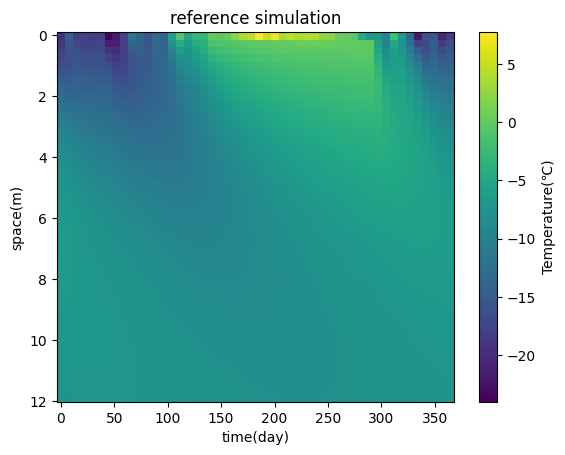

In [86]:
plot_data_heatmap(model=model1, data=data1, key=10, mode = "reference")

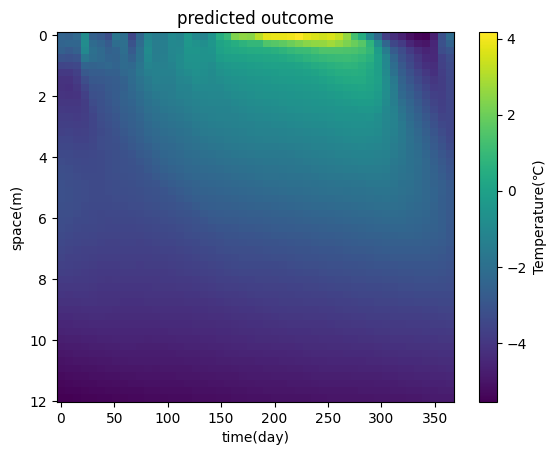

In [87]:
plot_data_heatmap(model=model1, data=data1, key=10, mode = "predict")

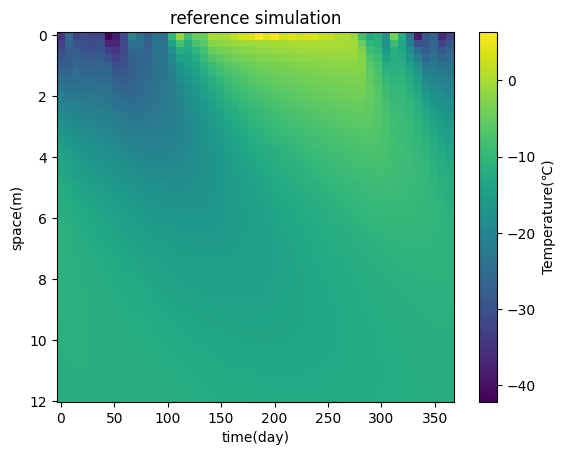

In [88]:
plot_data_heatmap(model=model1, data=data1, key=20, mode = "reference")

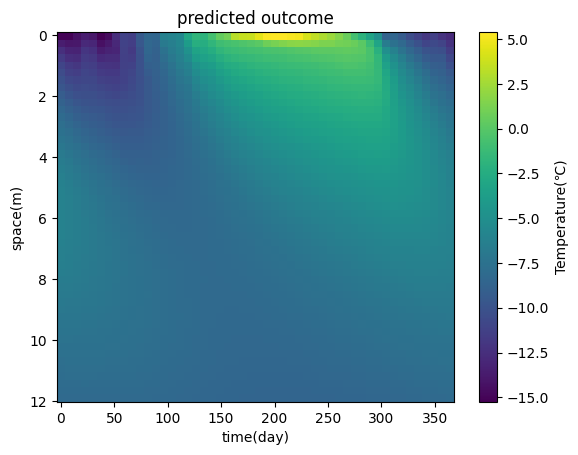

In [89]:
plot_data_heatmap(model=model1, data=data1, key=20, mode = "predict")

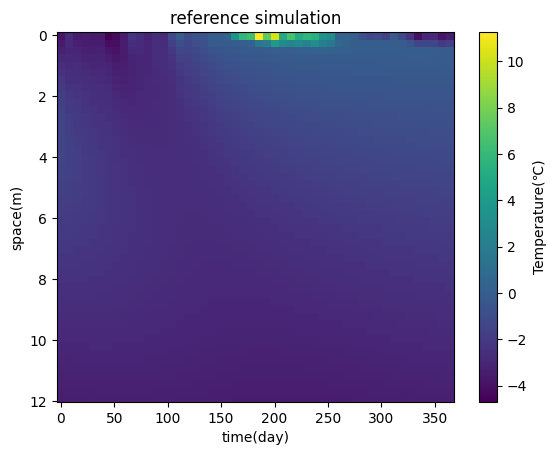

In [90]:
plot_data_heatmap(model=model1, data=data1, key=50, mode = "reference")

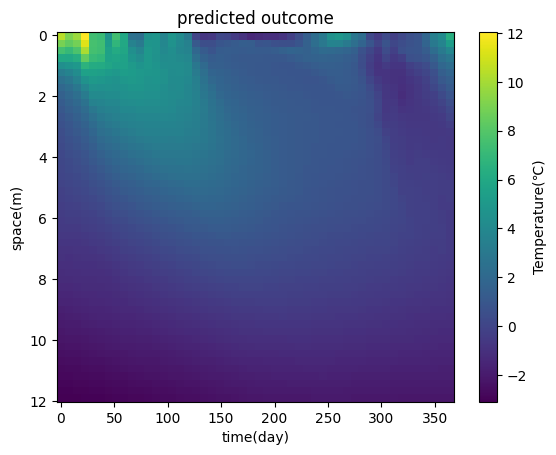

In [91]:
plot_data_heatmap(model=model1, data=data1, key=50, mode = "predict")

In [1]:
import numpy as np

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import deepxde as dde
from deepxde.backend import tf
from scipy.interpolate import LinearNDInterpolator
import xarray as xr
import pandas as pd

2023-09-22 11:17:41.497986: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 11:18:17.681979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Enable just-in-time compilation with XLA.



In [3]:
def plot_data_fixed_depth(key=10, experiment=3, depth=0.075, num_coords=54750, num_space = 150):
    # recover indexing for time
    a = int((key+1) % 10)
    b = int((key + 1 - a)/10)
    index_a = a - 1
    index_b = b - 1
    # restructure the space data
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    space_list = list(np.round(space_coords, decimals=2))
    space_str = [str(a) for a in space_list]
    iter_list = [n for n in range(150)]
    dict_list = list(zip(space_str, iter_list))
    dict_space = dict(dict_list)
    key_space = dict_space['{}'.format(depth)]
    #load the data
    data_plot = np.genfromtxt("permafrost_{}.{}.dat".format(experiment, key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    # recover the real time axis
    time = dataset["T"].coords["time"].values[(122+index_a*366):(487+index_a*366)]
    # collect the temperature data
    tem_ref = data_plot[:,2]
    tem_pre = data_plot[:,3]
    list_tem_ref = []
    list_tem_pre = []
    for n in range(365):
        list_tem_ref.append(tem_ref[n*150+key_space])
        list_tem_pre.append(tem_pre[n*150+key_space])
    # making the plot
    plt.figure(figsize=(8,6))
    plt.plot(time, list_tem_ref, label='reference', linestyle='-', color='blue')
    plt.plot(time, list_tem_pre, label='predicted', linestyle='-', color='red')
    plt.xlabel('Time')
    plt.ylabel('Temperature(℃)')
    plt.legend()
    plt.savefig("temperature{}_depth{}_{}.png".format(experiment, depth, key))

In [4]:
dataset = xr.load_dataset("data/cglite_freeW_ERA_MKL_2010-2020/cglite_freeW_ERA_MKL_2010-2020.nc")
input_data = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/input_data.csv")
parameters = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/parameters.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn/scripts/python/data/cglite_freeW_ERA_MKL_2010-2020/cglite_freeW_ERA_MKL_2010-2020.nc'

In [5]:
pwd

'/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn/scripts/python'

In [6]:
cd ..

/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn/scripts


In [7]:
cd ..

/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace/cryopinn


In [8]:
cd ..

/sparc/personal_accounts/02_Praktika/Zhengyang_Li/workspace


In [9]:
dataset = xr.load_dataset("data/cglite_freeW_ERA_MKL_2010-2020/cglite_freeW_ERA_MKL_2010-2020.nc")
input_data = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/input_data.csv")
parameters = pd.read_csv("data/cglite_freeW_ERA_MKL_2010-2020/parameters.csv")

In [10]:
def plot_data_fixed_depth(key=10, experiment=3, depth=0.075, num_coords=54750, num_space = 150):
    # recover indexing for time
    a = int((key+1) % 10)
    b = int((key + 1 - a)/10)
    index_a = a - 1
    index_b = b - 1
    # restructure the space data
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    space_list = list(np.round(space_coords, decimals=2))
    space_str = [str(a) for a in space_list]
    iter_list = [n for n in range(150)]
    dict_list = list(zip(space_str, iter_list))
    dict_space = dict(dict_list)
    key_space = dict_space['{}'.format(depth)]
    #load the data
    data_plot = np.genfromtxt("permafrost_{}.{}.dat".format(experiment, key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    # recover the real time axis
    time = dataset["T"].coords["time"].values[(122+index_a*366):(487+index_a*366)]
    # collect the temperature data
    tem_ref = data_plot[:,2]
    tem_pre = data_plot[:,3]
    list_tem_ref = []
    list_tem_pre = []
    for n in range(365):
        list_tem_ref.append(tem_ref[n*150+key_space])
        list_tem_pre.append(tem_pre[n*150+key_space])
    # making the plot
    plt.figure(figsize=(8,6))
    plt.plot(time, list_tem_ref, label='reference', linestyle='-', color='blue')
    plt.plot(time, list_tem_pre, label='predicted', linestyle='-', color='red')
    plt.xlabel('Time')
    plt.ylabel('Temperature(℃)')
    plt.legend()
    plt.savefig("temperature{}_depth{}_{}.png".format(experiment, depth, key))

In [11]:
space_coords = dataset["T"].coords["z"].values[0:150]

In [12]:
space_coords[1:30]

array([0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475,
       0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925,
       0.975, 1.025, 1.075, 1.125, 1.175, 1.225, 1.275, 1.325, 1.375,
       1.425, 1.475])

In [13]:
space_coords[60:90]

array([3.025, 3.075, 3.125, 3.175, 3.225, 3.275, 3.325, 3.375, 3.425,
       3.475, 3.525, 3.575, 3.625, 3.675, 3.725, 3.775, 3.825, 3.875,
       3.925, 3.975, 4.05 , 4.15 , 4.25 , 4.35 , 4.45 , 4.55 , 4.65 ,
       4.75 , 4.85 , 4.95 ])

In [14]:
space_coords[100:140]

array([6.05, 6.15, 6.25, 6.35, 6.45, 6.55, 6.65, 6.75, 6.85, 6.95, 7.05,
       7.15, 7.25, 7.35, 7.45, 7.55, 7.65, 7.75, 7.85, 7.95, 8.05, 8.15,
       8.25, 8.35, 8.45, 8.55, 8.65, 8.75, 8.85, 8.95, 9.05, 9.15, 9.25,
       9.35, 9.45, 9.55, 9.65, 9.75, 9.85, 9.95])

In [15]:
plot_data_fixed_depth(key=10, experiment=3, depth=0.075)

KeyError: '0.075'

In [16]:
def plot_data_fixed_depth(key=10, experiment=3, depth=0.075, num_coords=54750, num_space = 150):
    # recover indexing for time
    a = int((key+1) % 10)
    b = int((key + 1 - a)/10)
    index_a = a - 1
    index_b = b - 1
    # restructure the space data
    space_coords = dataset["T"].coords["z"].values[0:num_space]
    space_list = list(np.round(space_coords, decimals=3))
    space_str = [str(a) for a in space_list]
    iter_list = [n for n in range(150)]
    dict_list = list(zip(space_str, iter_list))
    dict_space = dict(dict_list)
    key_space = dict_space['{}'.format(depth)]
    #load the data
    data_plot = np.genfromtxt("permafrost_{}.{}.dat".format(experiment, key), delimiter=' ')
    # constructing the grid
    x = data_plot[:,1]
    t = data_plot[:,0]
    # recover the real time axis
    time = dataset["T"].coords["time"].values[(122+index_a*366):(487+index_a*366)]
    # collect the temperature data
    tem_ref = data_plot[:,2]
    tem_pre = data_plot[:,3]
    list_tem_ref = []
    list_tem_pre = []
    for n in range(365):
        list_tem_ref.append(tem_ref[n*150+key_space])
        list_tem_pre.append(tem_pre[n*150+key_space])
    # making the plot
    plt.figure(figsize=(8,6))
    plt.plot(time, list_tem_ref, label='reference', linestyle='-', color='blue')
    plt.plot(time, list_tem_pre, label='predicted', linestyle='-', color='red')
    plt.xlabel('Time')
    plt.ylabel('Temperature(℃)')
    plt.legend()
    plt.savefig("temperature{}_depth{}_{}.png".format(experiment, depth, key))

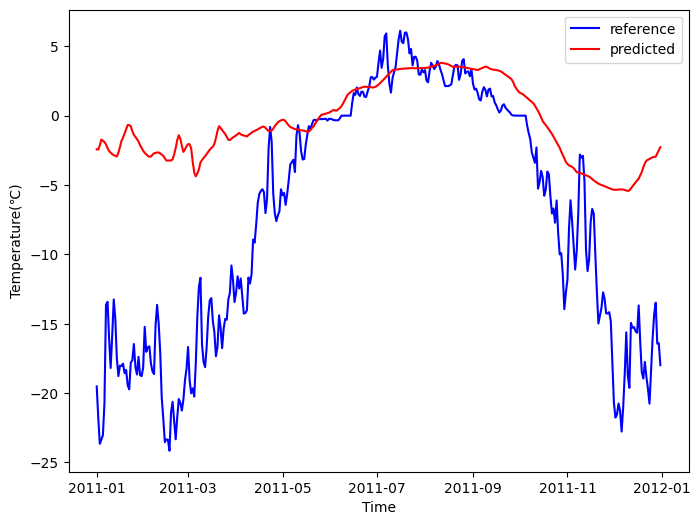

In [17]:
plot_data_fixed_depth(key=10, experiment=3, depth=0.075)

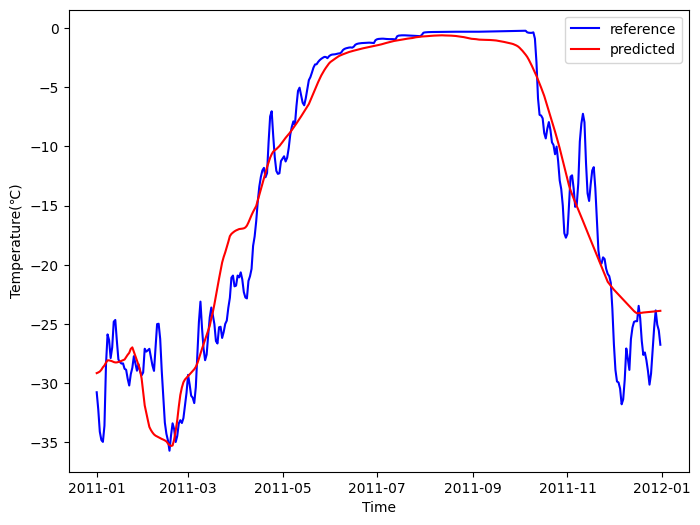

In [18]:
plot_data_fixed_depth(key=30, experiment=3, depth=0.375)

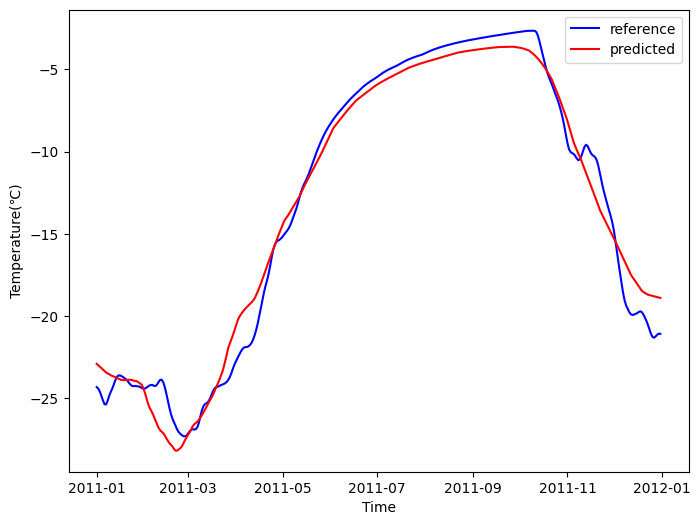

In [19]:
plot_data_fixed_depth(key=30, experiment=3, depth=1.475)

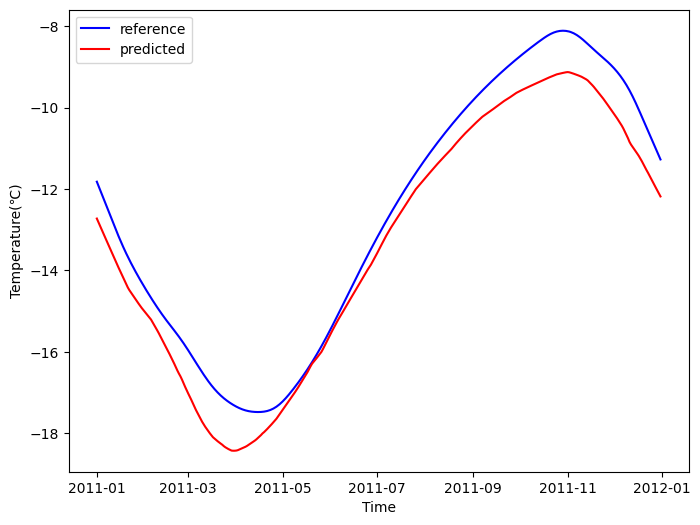

In [20]:
plot_data_fixed_depth(key=30, experiment=3, depth=4.95)

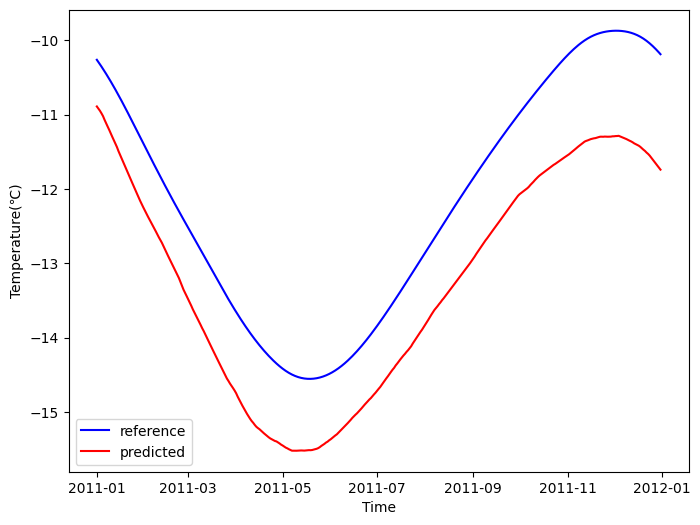

In [21]:
plot_data_fixed_depth(key=30, experiment=3, depth=7.35)

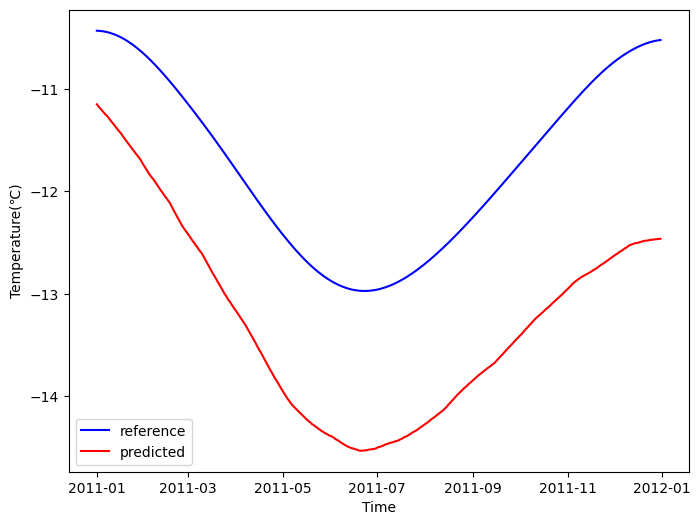

In [22]:
plot_data_fixed_depth(key=30, experiment=3, depth=9.55)

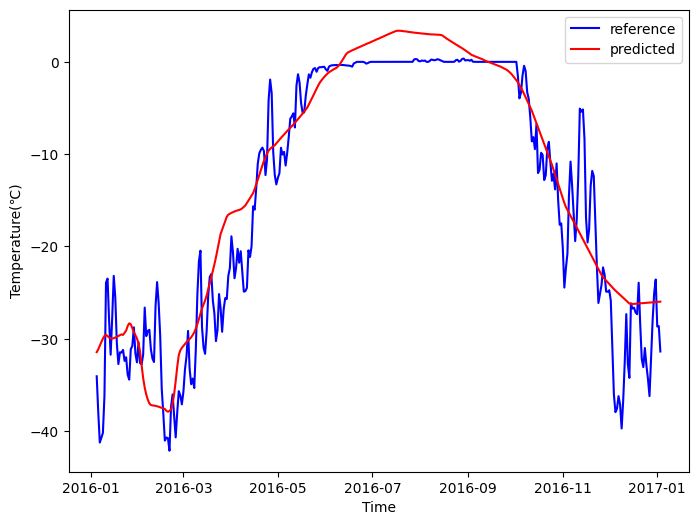

In [23]:
plot_data_fixed_depth(key=55, experiment=3, depth=0.075)

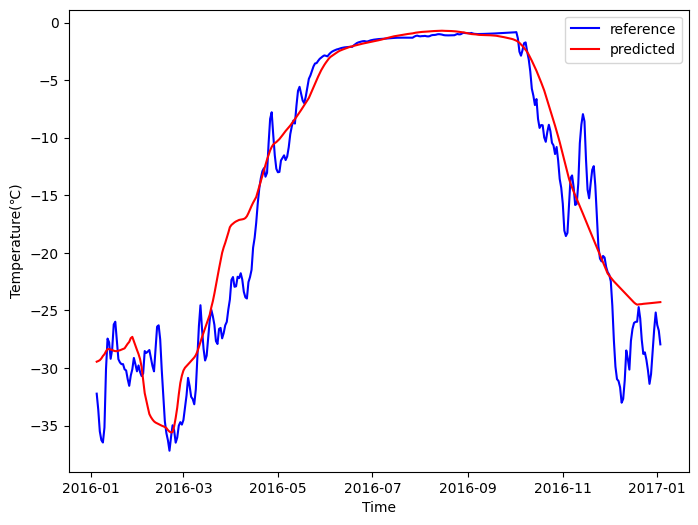

In [24]:
plot_data_fixed_depth(key=55, experiment=3, depth=0.375)

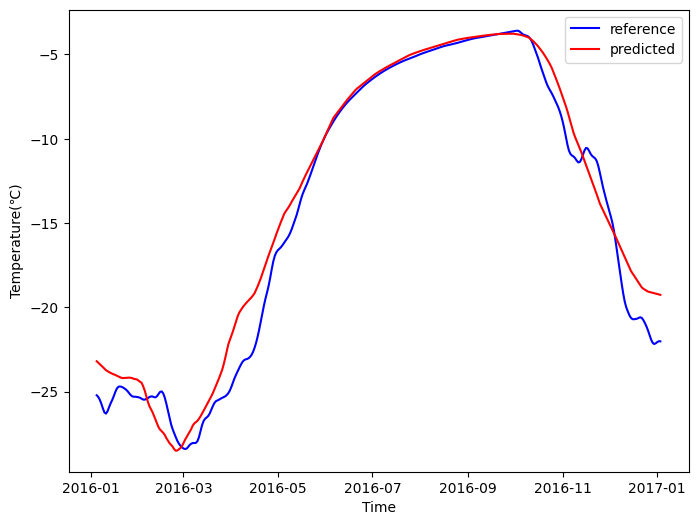

In [25]:
plot_data_fixed_depth(key=55, experiment=3, depth=1.475)

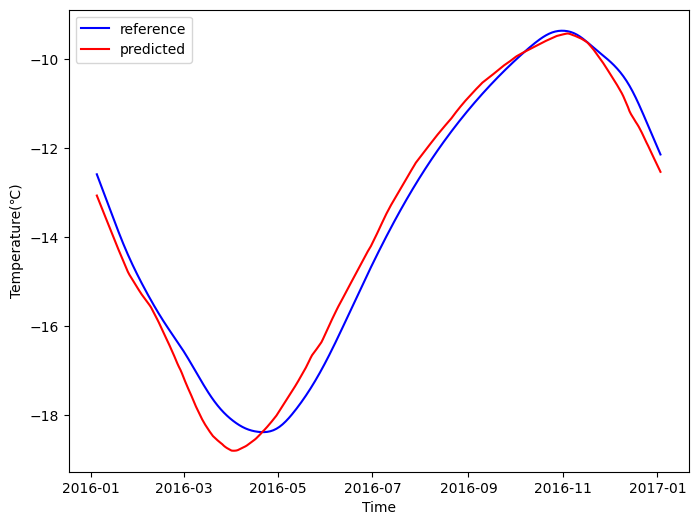

In [26]:
plot_data_fixed_depth(key=55, experiment=3, depth=4.95)

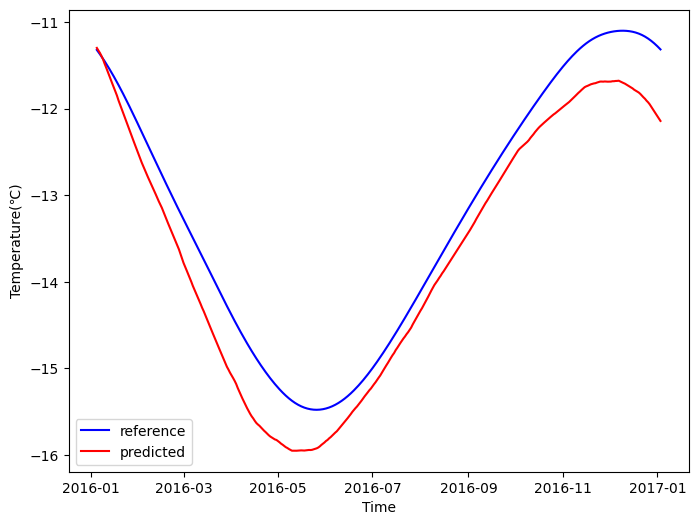

In [27]:
plot_data_fixed_depth(key=55, experiment=3, depth=7.35)

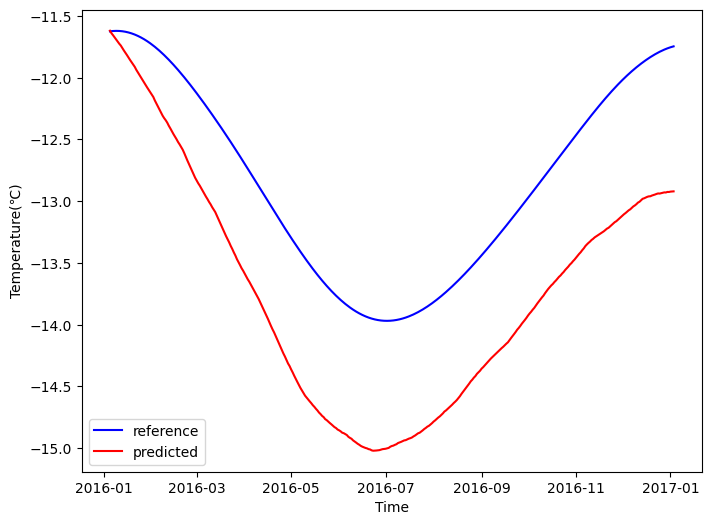

In [28]:
plot_data_fixed_depth(key=55, experiment=3, depth=9.55)

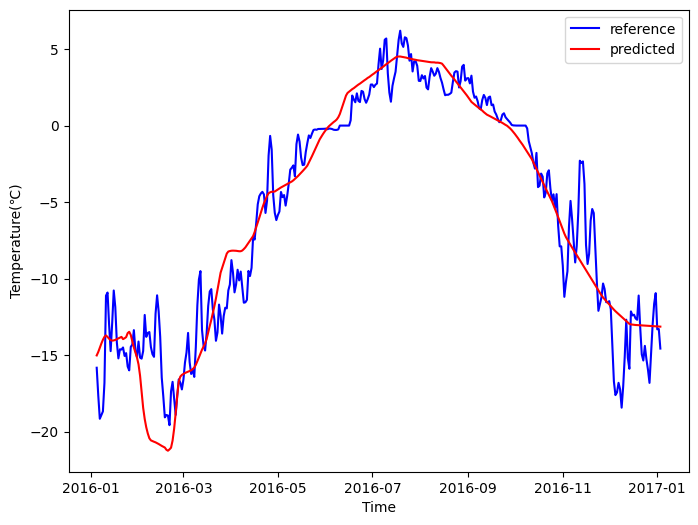

In [29]:
plot_data_fixed_depth(key=85, experiment=3, depth=0.075)

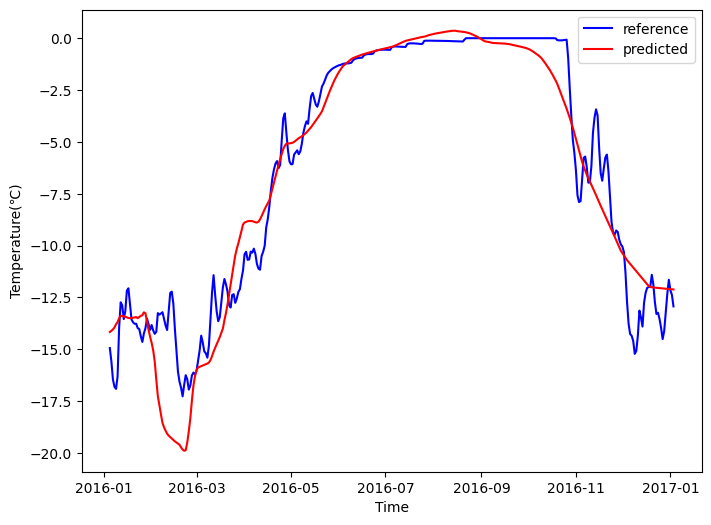

In [30]:
plot_data_fixed_depth(key=85, experiment=3, depth=0.375)

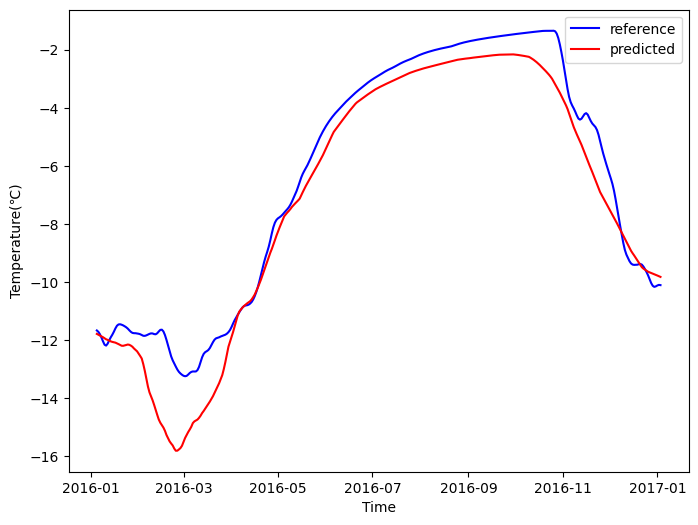

In [31]:
plot_data_fixed_depth(key=85, experiment=3, depth=1.475)

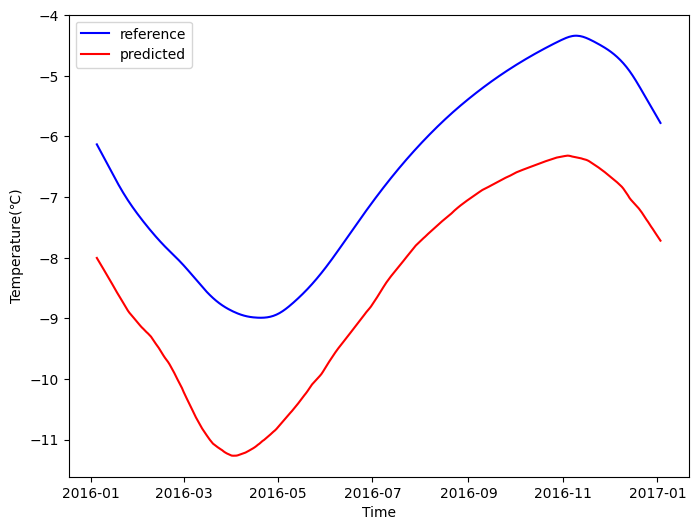

In [32]:
plot_data_fixed_depth(key=85, experiment=3, depth=4.95)

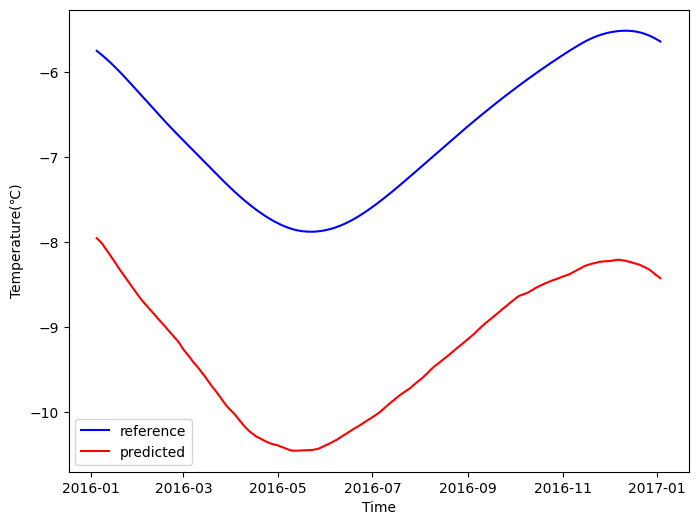

In [33]:
plot_data_fixed_depth(key=85, experiment=3, depth=7.35)

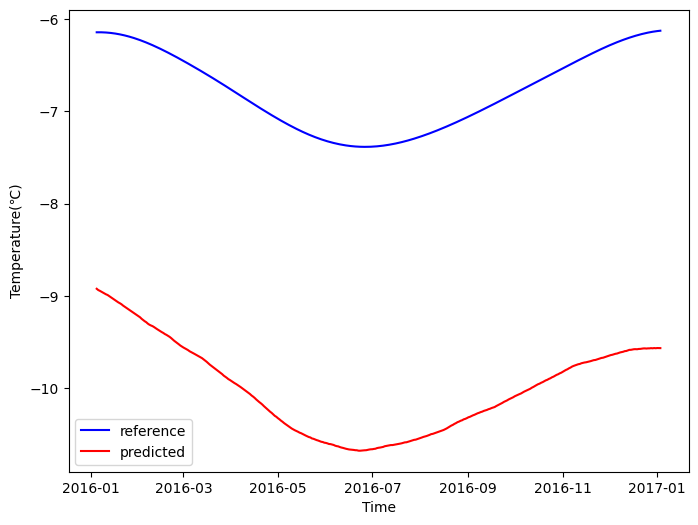

In [34]:
plot_data_fixed_depth(key=85, experiment=3, depth=9.55)

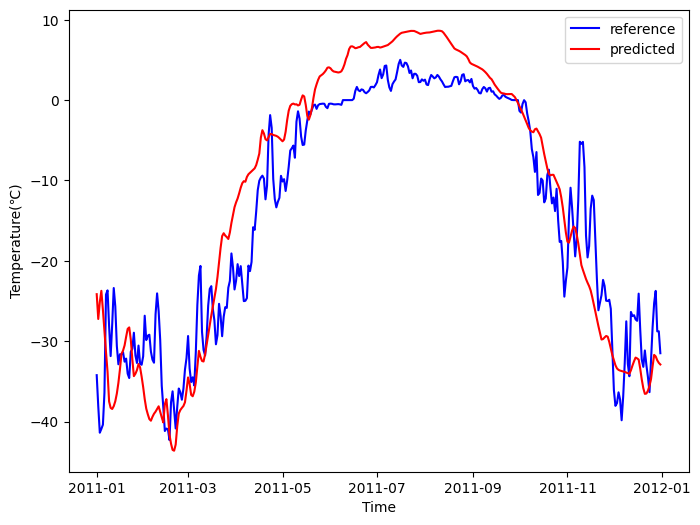

In [35]:
plot_data_fixed_depth(key=20, experiment=2, depth=0.075)

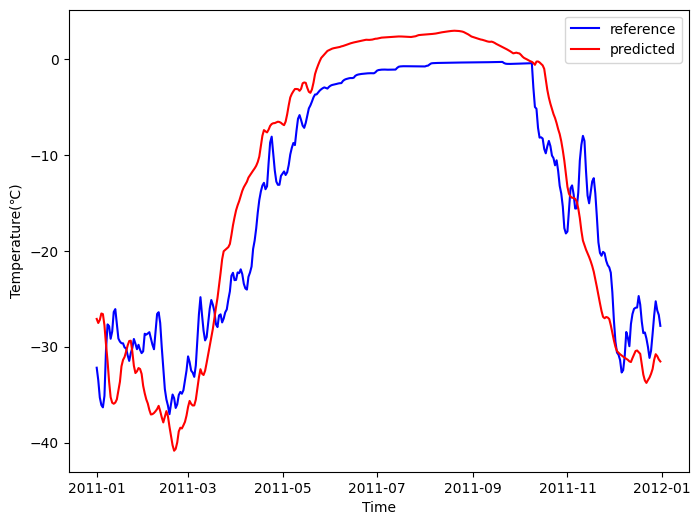

In [36]:
plot_data_fixed_depth(key=20, experiment=2, depth=0.375)

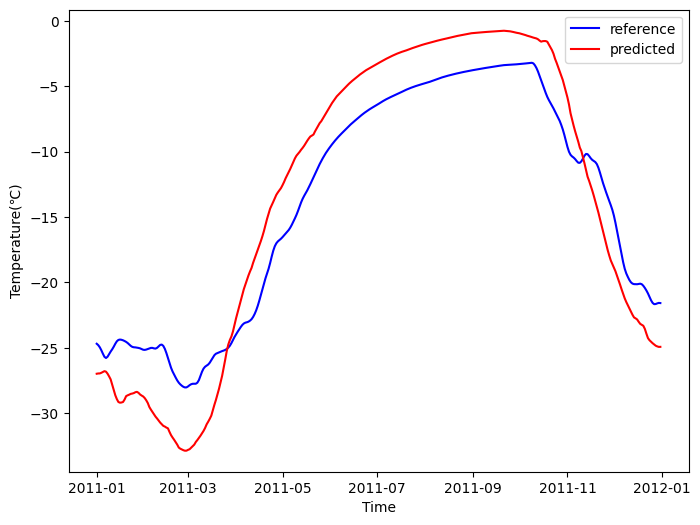

In [37]:
plot_data_fixed_depth(key=20, experiment=2, depth=1.475)

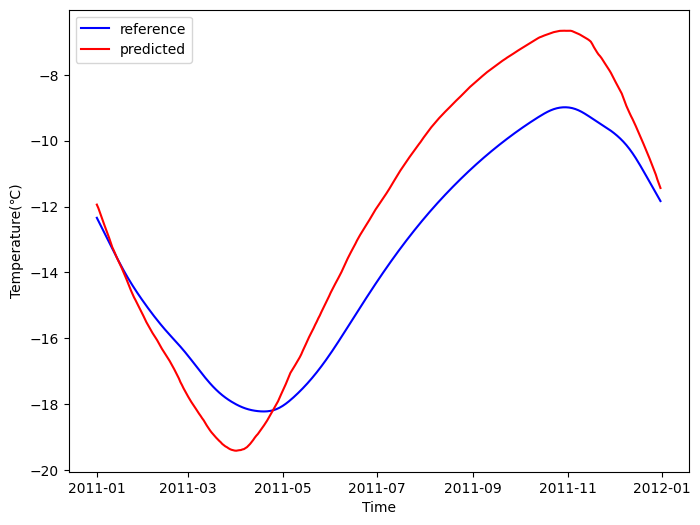

In [38]:
plot_data_fixed_depth(key=20, experiment=2, depth=4.95)

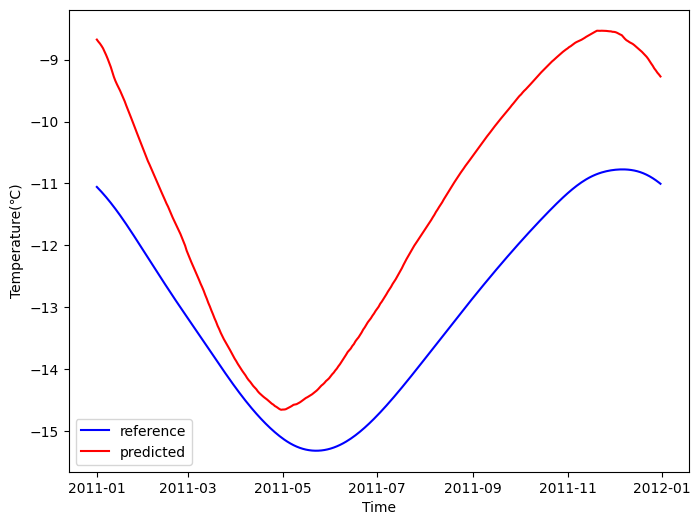

In [39]:
plot_data_fixed_depth(key=20, experiment=2, depth=7.35)

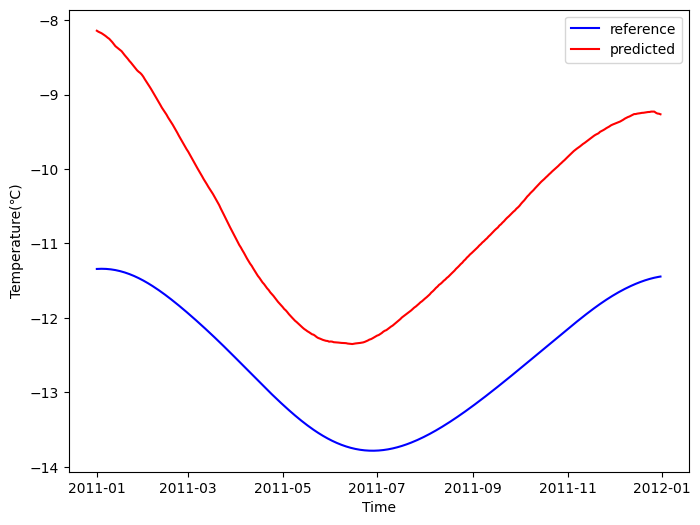

In [40]:
plot_data_fixed_depth(key=20, experiment=2, depth=9.55)